In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
import cv2
from PIL import Image
import numpy as np
import pandas as pd
import os

In [2]:
# my code
from myutils.mics import *
from myutils.Oraclenet import *
from myutils.MyDataset import *
from myutils.BoxMaker import *

import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

# font setting
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}
font_label = {'family': 'NanumBarunGothic', 'size': 12, 'color': 'black'}

NanumBarunGothic


In [3]:
# class BoxMaker(nn.Module):
#     def __init__(self):
#         super(BoxMaker, self).__init__()
#         global_average_pooling = torch.nn.AdaptiveAvgPool2d(output_size=(1, 1))
#         flatten = Flatten()
        
#         # backbone layer
#         self.backbone = nn.Sequential(
#             # 1x1 conv
#             nn.Conv2d(5, 32, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
#             nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
#             nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(64, 128, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
#             nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(128, 256, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
#             nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2), # b*cls x 256 x 14 x 14
#             # global_average_pooling, # n x 256 x 1 x 1
#             # flatten, # n x 256
#         )
        
#         self.backbone2 = nn.Sequential(
#             # 1x1 conv
#             nn.Conv2d(5, 32, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
#             nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
#             nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(64, 128, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
#             nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2),
#             nn.Conv2d(128, 256, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
#             nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.MaxPool2d(2,2), # b*cls x 256 x 14 x 14
#             # global_average_pooling, # n x 256 x 1 x 1
#             # flatten, # n x 256
#         )
        
#         self.multihead_attn = nn.MultiheadAttention(embed_dim=512, num_heads=8)
                        
#         self.onecv = nn.Sequential(
#             # 1x1 conv
#             nn.Conv2d(512, 256, kernel_size=(5,5), stride=(2,2)),
#             nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),
#             nn.Conv2d(256, 64, kernel_size=(5,5), stride=(2,2)),
#             nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
#             nn.ReLU(),       
#             nn.Conv2d(64, 5, kernel_size=(5,5), stride=(2,2)),
#         )
        
# #         # fc layer
# #         self.fc = nn.Sequential(
# #             nn.Linear(512, 128),
# #             nn.ReLU(),
# #             nn.Linear(128, 32),
# #             nn.ReLU(),
# #             nn.Linear(32, 5), # score_logit + cx,cy,w,h
# #         )
        
#         self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

        
#     def forward(self, inputs, edge):
#         """
#         inputs - cls,ch,h,w
#         edge  - 1,1,h,w
#         디텍터는 한번에 한 프레임밖에 안됨
#         """
#         n_cls = inputs.shape[0]
#         # CNN backbone
#         images = inputs # cls,ch,h,w
#         hhr = torch.cat([edge]*n_cls) # cls x 1 x h x w
#         hhr2 = nn.functional.interpolate(hhr, [224,224]) # cls x 12 x 224 x 224


#         images_all = nn.functional.interpolate(images, [224,224]) # cls x 12 x 224 x 224
#         images_all2 = torch.cat([images_all,hhr2], dim=1) # cls x 12 x h x w

#         print('<>>', images_all2.shape)
#         hh = self.backbone(images_all2) # cls x 256 x 14 x 14
#         hh2 = self.backbone2(images_all2) # cls x 256 x 14 x 14
        

#         aft_conv_shape = hh.shape[-2:]
#         aft_conv_flat = aft_conv_shape[0]*aft_conv_shape[1] # 14 x 14 where 224 input 
        
#         hh = hh.reshape(-1, 256, aft_conv_flat) # cls x 256 x aft_conv_flat
#         hh2 = hh2.reshape(-1, 256, aft_conv_flat) # cls x 256 x aft_conv_flat
        
#         hh3 = torch.cat([hh,hh2], dim=1) # cls x 512 x aft_conv_flat
#         hh3 = hh3.transpose(1,2) # cls x aft_conv_flat x 512
        
#         attn_output, attn_output_weights = self.multihead_attn(hh3, hh3, hh3) # q,k,v - Seq,Batch,Embed - cls,aft_conv_flat,512       
#         attn_sum = hh3+attn_output # cls x aft_conv_flat x 512
        
#         res = attn_sum.transpose(1,2) # cls x 512 x aft_conv_flat

#         res2 = res.reshape(-1,512, *aft_conv_shape) # cls x 512 x 14 x 14 - for conv 
        
#         print('{{}}', pp.shape)
#         pp = self.onecv(res2) # cls x 5(1+4) x 14 x 14
#         pp = pp.transpose(2,1) # cls x 14 x 14 x 5(1+4)
#         pp = pp.reshape(-1,aft_conv_flat,5)
#         logit = pp[:,:,0] # cls x aft_conv_flat
#         coords = pp[:,:,1:] # cls x aft_conv_flat x 4
        
#         return logit, coords, aft_conv_shape

In [4]:
sobel = Sobel()
sobel.to(sobel.device)

Sobel(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (conv2): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)

In [5]:
# boxMaker(torch.rand(1, 11, 2052, 30, 20).cuda())

In [6]:
# from torchsummary import summary
# summary(boxMaker, (2052, 30, 20))

In [7]:
model = OracleModel()
model.to(model.device)
model.eval()
print()

---
# Classification

In [8]:
# """
# 전체 피처 데이터 재생성
# """
# referenceImgDirPath = '.\\references\\images_trimed_21' # 21 classes

# featuresPath = 'cosmetic_features_cos.csv'
# meanPath = 'cosmetic_means_cos.csv'
# makeAllReferenceCSV(model, referenceImgDirPath, featuresPath, meanPath, n_sample=None)

In [9]:
"""
전체 피처 데이터 재생성
"""
referenceImgDirPath = '.\\references\\images_trimed_10' # 10 classes

featuresPath = 'cosmetic_features_cos.csv'
meanPath = 'cosmetic_means_cos.csv'
makeAllReferenceCSV(model, referenceImgDirPath, featuresPath, meanPath, n_sample=5)

A Jupyter Widget

In [10]:


# -------------- n개 클래스만 validation 샘플링 세팅 및 폴더정리 ----------------
reference_dataset = torchvision.datasets.ImageFolder(
    root=referenceImgDirPath,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)
sample_dir_list = reference_dataset.classes

# -------------- 레퍼런스 데이터에서 n개 클래스 임베딩 & 레이블 & means 추출 -----------------
featuresPath = 'cosmetic_features_cos.csv'
meanPath = 'cosmetic_means_cos.csv'

df_ref_featere_sampled, reference_means_sampled = get_sample_reference(featuresPath, meanPath, showData=True)

# ---------------------------- 레퍼런스셋 로드 및 임베딩 세팅 ---------------------------------
model.setReferenceDataset(sample_dir_list, df_ref_featere_sampled, reference_means_sampled)

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,label
0,0.058758,0.682577,0.672170,0.092239,0.618472,0.707633,0.562048,0.268817,0.697828,0.413518,...,0.378564,0.350061,0.467298,0.101682,0.106223,0.146766,0.163086,0.368374,0.412753,AHC-AGELESS REAL EYE CREAM FOR FACE
1,0.779068,0.436790,0.940406,0.253605,0.807085,0.611577,0.939517,0.295597,0.552163,0.376912,...,0.297767,0.773619,0.297535,0.178724,0.157481,0.549530,0.664523,0.660091,0.166286,AHC-AGELESS REAL EYE CREAM FOR FACE
2,0.275406,0.213885,0.311426,0.891264,0.901248,0.264228,0.843593,0.093173,0.864324,0.562926,...,0.016894,0.894258,0.497535,0.185702,0.126120,0.509018,0.424446,0.680979,0.873942,AHC-AGELESS REAL EYE CREAM FOR FACE
3,0.301848,0.447783,0.737731,0.204914,0.392145,0.920094,0.310044,0.199206,0.146459,0.050588,...,0.263989,0.420457,0.580487,0.095794,0.057374,0.594879,0.874467,0.512844,0.985858,AHC-AGELESS REAL EYE CREAM FOR FACE
4,0.664640,0.273936,0.281929,0.627942,0.877210,0.725258,0.508599,0.193804,0.862088,0.401944,...,0.206640,0.528254,0.667441,0.771896,0.084007,0.296016,0.264129,0.138443,0.293816,AHC-AGELESS REAL EYE CREAM FOR FACE
5,0.621907,0.114477,0.418723,0.504388,0.383261,0.820849,0.451311,1.168331,0.490702,0.000000,...,0.059667,0.361515,0.438546,0.536281,0.122633,0.448789,0.286432,0.045531,0.579849,AHC-Aura Secret Toneup Cream
6,0.866498,0.964683,0.036669,0.124296,1.167681,0.543951,0.140038,0.962299,0.512692,0.300353,...,0.600575,0.156042,0.712928,0.278573,0.046987,0.704912,0.050351,0.063256,0.053504,AHC-Aura Secret Toneup Cream
7,1.646986,1.266044,0.754870,0.411764,0.600486,2.095293,0.130297,0.444640,0.895454,0.257049,...,0.060247,0.343841,0.761234,0.188881,0.140486,0.496395,0.083780,0.396674,0.317138,AHC-Aura Secret Toneup Cream
8,0.507682,0.508268,0.058337,0.275847,0.631632,0.681637,0.009181,0.668564,0.163559,0.216964,...,0.550615,0.072235,0.494915,0.256686,0.074040,0.403572,0.008817,0.017823,0.392386,AHC-Aura Secret Toneup Cream
9,0.796906,0.379971,0.812219,0.309360,0.405019,1.299381,0.104443,0.621911,0.474669,0.084444,...,0.500286,0.471329,0.813882,0.101631,0.045635,0.408141,0.216836,0.161190,0.340473,AHC-Aura Secret Toneup Cream


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
label,,,,,,,,,,,,,,,,,,,,,
AHC-AGELESS REAL EYE CREAM FOR FACE,0.415944,0.410994,0.588732,0.413993,0.719232,0.645758,0.632760,0.210119,0.624572,0.361178,...,0.557324,0.232771,0.593330,0.502059,0.266760,0.106241,0.419242,0.478130,0.472146,0.546531
AHC-Aura Secret Toneup Cream,0.887996,0.646689,0.416164,0.325131,0.637616,1.088222,0.167054,0.773149,0.507415,0.171762,...,0.601489,0.354278,0.280992,0.644301,0.272410,0.085956,0.492362,0.129243,0.136895,0.336670
AHC-ONLY FOR MAN LOTION,0.768482,0.459639,0.114627,0.411405,0.680054,1.074215,0.336195,0.259283,0.218034,0.154548,...,0.406808,0.215762,0.187739,0.297759,0.704180,0.100054,0.302708,0.131331,0.440876,0.971862
APIEU-데카소사이드 시카 겔 데이크림,0.888087,0.733584,0.753540,0.380573,0.548067,0.351287,0.949546,0.534677,0.197263,0.144645,...,0.880556,0.168661,0.398444,0.837765,0.323984,0.107304,0.787468,0.221674,0.507319,1.834978
APIEU-스타트업 포어 프라이머,0.546606,0.660990,0.971007,0.419699,1.098260,0.705130,0.828296,0.774031,0.561504,0.466725,...,0.502455,0.232474,0.443975,0.623209,0.525195,0.089762,0.334919,0.466939,0.601570,0.710337
BANILACO-프라임 프라이머 클래식,0.630085,0.354611,1.107054,0.198006,0.486948,1.158821,0.967965,0.584032,0.497902,0.233164,...,0.238104,0.216341,0.278872,0.524244,1.040648,0.068617,0.216083,0.444001,0.333356,0.862407
BELIF-The true cream AQUA BOMB,0.770897,0.742763,0.719773,0.230856,0.604233,0.586970,0.606062,0.717811,0.534963,0.210105,...,0.529946,0.100009,0.117539,0.633409,0.812531,0.091358,0.523917,0.361144,0.618678,1.421567
CLIO-스파클링 라인 프리즘 에어 아이섀도우,0.597640,0.569808,0.365692,0.169119,1.225176,0.213183,0.930600,0.684841,0.806628,0.275902,...,0.361946,0.228549,0.325365,0.641070,0.501397,0.086269,0.255390,0.087524,0.219818,0.345896
FERRAGAMO-INCANTO CHARMS,1.467180,0.544040,1.026588,0.446299,0.409756,0.296977,0.097039,0.503575,0.605678,0.291920,...,1.224812,0.256789,0.166517,1.191916,0.458098,0.133934,0.604935,0.185320,0.863181,0.407829


---
# PASCAL VOC SETTING

In [10]:
# *********************pascal voc***********************
voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
                'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
                'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
voc_c2i = {c:i for i,c in enumerate(voc_classes)}

voc_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='train', download=False, 
        transform=transforms.Compose([
#         transforms.Resize([224,224]),
#         transforms.RandomHorizontalFlip(),
#         transforms.RandomRotation(45),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]))
voc_loader = torch.utils.data.DataLoader(voc_dataset, batch_size=1,
                                          shuffle=True, num_workers=4)
# *********************pascal voc***********************

In [11]:
featuresPath = 'reference_features_voc.csv'
meanPath = 'reference_means_voc.csv'

sample_dir_list = voc_classes

# -------------- 레퍼런스 데이터에서 n개 클래스 임베딩 & 레이블 & means 추출 -----------------
df_ref_featere_sampled, reference_means_sampled = get_sample_reference(featuresPath, meanPath, showData=False)

# ---------------------------- 레퍼런스 셋 로드 및 임베딩 세팅 ---------------------------------
model.setReferenceDataset(sample_dir_list, df_ref_featere_sampled, reference_means_sampled)

In [10]:
voc_val_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='train', download=False, 
        transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

voc_val_loader = torch.utils.data.DataLoader(voc_val_dataset, batch_size=1,
                                          shuffle=False, num_workers=4)

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

target_all = [] #ground truth bboxs
area_all = []
for data, target in tqdm(voc_val_loader):

#     frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
#     featuremaps = model(im_tensor)
    targets_gt, boxes_gt, filename_gt = voc_cvt(im_tensor, target) # 정답 데이터, 레이블, bbox
#     if(len(targets_gt)!=1): continue # 물체 하나만 있는거

    boxes_gt_yolo = cvt2yolobox(boxes_gt, im_tensor.shape[-2:])
    area = boxes_gt_yolo[:,2]*boxes_gt_yolo[:,3]
    area_all.append(area)
    target_all.append(targets_gt)
#     print('<<>>',area)
#     if(area<0.01 or area>0.64): continue # 0.1^2 <= area <= 0.8^2

target_all = np.concatenate(target_all)
area_all = np.concatenate(area_all)

df = pd.DataFrame(list(zip(target_all, area_all)), columns=['target', 'area'])
df2 = df.groupby('target').describe().iloc[:, 0:]
df2.index = voc_classes

A Jupyter Widget

In [22]:
voc_val_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='train', download=False, 
        transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

voc_val_loader = torch.utils.data.DataLoader(voc_val_dataset, batch_size=1,
                                          shuffle=False, num_workers=4)

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

target_all = [] #ground truth bboxs
area_all = []
for data, target in tqdm(voc_val_loader):

#     frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
#     featuremaps = model(im_tensor)
    targets_gt, boxes_gt, filename_gt = voc_cvt(im_tensor, target) # 정답 데이터, 레이블, bbox
#     if(len(targets_gt)!=1): continue # 물체 하나만 있는거

    boxes_gt_yolo = cvt2yolobox(boxes_gt, im_tensor.shape[-2:])
    area = boxes_gt_yolo[:,2]*boxes_gt_yolo[:,3]
    area_all.append(area)
    target_all.append(targets_gt)
#     print('<<>>',area)
#     if(area<0.01 or area>0.64): continue # 0.1^2 <= area <= 0.8^2

A Jupyter Widget

In [152]:
import time
# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='trainval', download=False, 
        transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

voc_val_loader = torch.utils.data.DataLoader(voc_val_dataset, batch_size=1,
                                          shuffle=True, num_workers=4)

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
SHOW_IMAGE = False # 이미지 볼지 말지
USE_KNN = False

target_all = [] #ground truth bboxs
heat_all = []
box_yolo_all = []
sobel_all = []

allowedList = [0,1,2,6,7,9,11,12,13,16,18]
print('[num_class]:', len(sample_dir_list), sample_dir_list)
for data, target in tqdm(voc_val_loader):
    
    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data
    featuremaps = model(im_tensor)
    targets_gt, boxes_gt, filename_gt = voc_cvt(im_tensor, target) # 정답 데이터, 레이블, bbox
#     if(len(targets_gt)!=1): continue # 물체 하나만 있는거
#     if(targets_gt.item() not in allowedList): continue
    # 해당되는 클래스만
#     m = [t in allowedList for t in targets_gt]
#     targets_gt = targets_gt[m]
#     boxes_gt = boxes_gt[m]
#     if(len(targets_gt)==0): continue
    
    boxes_gt_yolo = cvt2yolobox(boxes_gt, data.shape[2:])
#     area = boxes_gt_yolo[0][2]*boxes_gt_yolo[0][3]
#     if(area<0.01 or area>0.64): continue # 0.1^2 <= area <= 0.8^2
        
    # --------------------------
#     _data = nn.UpsamplingNearest2d([224,224])(data)
    data_sobel = sobel(data.cuda())
                
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.25, 0.25), 
                                           calculator=my_cos, reference_means=model.embedded_means)

    

[num_class]: 20 ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']


A Jupyter Widget

RuntimeError: Expected 4-dimensional input for 4-dimensional weight 64 3 7 7, but got 3-dimensional input of size [3, 500, 375] instead

In [12]:
def voc_cvt(target):
    """
    voc dataloader를 받아와서 bbox 배치로 내보내줌
    voc dataloader의 batch size는 반드시 1이어야 오류 안남
    @return bboxes - x,y,w,h
    """
    voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
                'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
                'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
    voc_c2i = {c:i for i,c in enumerate(voc_classes)}

    _temp_targets = []
    _temp_bboxes = []
    infos =  target['annotation']['object']
    filename =  target['annotation']['filename']
    if(type(infos)==dict): infos = [infos]    
    
    _temp_targets+=list(map(lambda x: x['name'], infos))    
    for info in infos:
        x1 = int(info['bndbox']['xmin'])
        x2 = int(info['bndbox']['xmax'])
        y1 = int(info['bndbox']['ymin'])
        y2 = int(info['bndbox']['ymax'])
        _temp_bboxes.append([x1,y1,x2-x1,y2-y1]) # x,y,w,h

    targets = np.array([voc_c2i[c] for c in _temp_targets])
    bboxes = np.array(_temp_bboxes)
    return targets, bboxes, filename

In [13]:
# #  데이터셋 정리

# allowedList = [0,1,2,6,7,9,11,12,13,16,18]
# notallowedList = [3,4,5,8,10,14,15,17,19]
# voc_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='trainval', download=False, 
#         transform=transforms.Compose([
#         transforms.ToTensor(),
#     ]))


# cnt = 0
# indices = []
# for i in tqdm(range(len(voc_dataset))):
#     data, target = voc_dataset[i]
#     im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
#     featuremaps = model(im_tensor)
#     targets_gt, boxes_gt, filename_gt = voc_cvt(target) # 정답 데이터, 레이블, bbox

#     # 금지목록 해당되는 클래스만
#     m = [t in notallowedList for t in targets_gt]
#     if(any(m)): continue
# #     targets_gt = targets_gt[m]
# #     boxes_gt = boxes_gt[m]
# #     if(len(targets_gt)==0): continue

#     boxes_gt_yolo = cvt2yolobox(boxes_gt, data.shape[-2:])

#     areas = boxes_gt_yolo[:,2]*boxes_gt_yolo[:,3]
#     mask = (areas>0.01)&(areas<0.64)
#     if not all(mask): continue
#     cnt+=1
#     indices.append(i)
# print(cnt)

# import pickle

# voc_indices = {
#     'indices': indices
# }

# pickle.dump(voc_indices, open("voc_indices.pickle", 'wb'), protocol=4)

In [14]:
# 인덱스 불러오기
import pickle

# load
with open("voc_indices.pickle", 'rb') as f:
    voc_indices = pickle.load(f)
    indices = voc_indices['indices']

print(len(indices))
n_train = 3030
np.random.shuffle(indices)
indices_train = indices[:n_train]
indices_val = indices[n_train:]
print('train:', len(indices_train), 'val:', len(indices_val))

3231
train: 3030 val: 201


In [15]:
tt = []
cc = []
for i in tqdm(indices_train):
    data, target = voc_dataset[i]
    targets_gt, boxes_gt, filename_gt = voc_cvt(target) # 정답 데이터, 레이블, bbox
    tt.append(targets_gt)
    cc.append(len(targets_gt))

tt= np.concatenate(tt)
set(tt)

A Jupyter Widget

IndexError: list index out of range

In [264]:
Counter(tt), Counter(cc)

(Counter({0: 504,
          1: 106,
          2: 711,
          6: 383,
          7: 557,
          9: 272,
          11: 636,
          12: 255,
          13: 125,
          16: 372,
          18: 334}),
 Counter({1: 2277, 2: 496, 3: 144, 4: 59, 5: 26, 6: 17, 7: 5, 8: 3, 9: 3}))

In [165]:
# data, target = voc_dataset[10]
# im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
# featuremaps = model(im_tensor)
# targets_gt, boxes_gt, filename_gt = voc_cvt(target)

In [16]:
voc_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='trainval', download=False, 
        transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

allowedList = [0,1,2,6,7,9,11,12,13,16,18]
# allowedList = list(range(20))
origTarget2newTarget = {t:i for i,t in enumerate(allowedList)}
allowedClass = np.array(voc_classes)[allowedList]

def getData(idx):
    """
    iterator
    """
    global allowedList
    data, target = voc_dataset[idx]
    im_tensor = voc_transform(data).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)
    targets_gt, boxes_gt, filename_gt = voc_cvt(target) # 정답 데이터, 레이블, bbox
    boxes_gt_yolo = torch.tensor(cvt2yolobox(boxes_gt, data.shape[-2:]))

    # --------------------------
#     _data = nn.UpsamplingNearest2d([224,224])(data)
    data_sobel = sobel(data.unsqueeze(0).cuda())

    origSize = im_tensor.shape[-2:]
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(.25, .25),
                                        calculator=my_cos, reference_means=model.embedded_means[allowedList]) # cls,ch,h.w
    
    resn_f = nn.functional.interpolate(featuremaps, preds_dist.shape[-2:]) # 1,2048,h.w
    
    targets_gt = torch.tensor([origTarget2newTarget[t] for t in targets_gt]).long() # 레이블 재배치
    one_hot = torch.zeros(len(targets_gt), len(allowedList))
    one_hot[torch.arange(len(targets_gt)), targets_gt] = 1
        
    return preds_dist.detach().data, boxes_gt_yolo.detach().data, one_hot, data, resn_f.detach().data, data_sobel.detach().data

In [17]:
def textureDetectMultiChannel(featuremaps, stride=(1,1), outSize=[224,224], upsample=False, calculator=None, reference_means=None, show=False):
    """
    box maker
    batch N - featuremaps.shape[0]
    calculator = my_cos
    reference_means = model.embedded_means
    """
    boxes_t = []
    base_boxes = []
    esp = 1e-4
    channels = [(1,1), (3,3), (5,5), (7,7)]
    # ------------------- 속도 최적화 필요 ----------------------
    # x,y 순서 바뀌면 안됨
    #     for filter_size in channels:
    y_range = np.arange(0,featuremaps.shape[2]-1+esp, stride[1])
    x_range = np.arange(0,featuremaps.shape[3]-1+esp, stride[0])
    for y in y_range:
        for x in x_range:
            xx = x+1/2
            yy = y+1/2
            xx2 = x+1/2
            yy2 = y+1/2
            base_boxes.append([xx,yy,xx2,yy2]) # x,y,x2,y2
    base_boxes = torch.tensor(base_boxes).data.cuda().float()
    
    for filter_size in channels:
        b = base_boxes.clone()
        b[:,0] = b[:,0]-filter_size[0]/2
        b[:,1] = b[:,1]-filter_size[1]/2
        b[:,2] = b[:,2]+filter_size[0]/2
        b[:,3] = b[:,3]+filter_size[1]/2
        boxes_t.append(b)
    boxes_t = torch.cat(boxes_t)
    # ------------------- 속도 최적화 필요 ----------------------
    
    if(show): print('<featuremaps-shape>', featuremaps.shape)
    crops = torchvision.ops.roi_align(featuremaps, [boxes_t]*featuremaps.shape[0], [1,1]).data
    if(show): print('<roi-align>', crops.squeeze().shape)
    
    # inference using cosine similarity via class mean vector
    preds_dist = calculator(crops.squeeze(), reference_means) # ch*h*w, cls
    if(show): print('<class, roi-shape>', preds_dist.shape, len(channels), len(y_range), len(x_range), '-->  (224,224)')
    preds_dist = preds_dist.transpose(1,0).reshape(-1, len(channels), len(y_range), len(x_range)) # cls, ch*h*w
    # upsampling to same size for batch process
    if(upsample):
#         preds_dist = nn.UpsamplingBilinear2d([224,224])(preds_dist)
        preds_dist = nn.functional.interpolate(preds_dist, outSize)
    if(show): print('[n_box]:', len(boxes_t))
    return preds_dist # cls,ch,h,w

def cvtGray(x):
    """
    x - b,3ch(R,G,B),h,w
    return - (b),1,h,w
    """
    # RGB to gray
    r, g, b = torch.chunk(x, chunks=3, dim=-3)
    gray = 0.299 * r + 0.587 * g + 0.110 * b
    return gray

In [18]:
dataIndices = {
    'train': indices_train,
    'val': indices_val
}
dataset_sizes = {
    'train': len(indices_train),
    'val': len(indices_val)
}

print(dataset_sizes)

{'train': 3030, 'val': 201}


In [42]:
h,b,t,d,f,s = getData(indices_train[0])
d.shape, h.shape, b.shape, t.shape, f.shape, s.shape

(torch.Size([3, 375, 500]),
 torch.Size([11, 4, 45, 61]),
 torch.Size([1, 4]),
 torch.Size([1, 11]),
 torch.Size([1, 2048, 45, 61]),
 torch.Size([1, 1, 375, 500]))

[AREA gt] tensor([0.4171], dtype=torch.float64)
torch.Size([11, 4, 41, 61]) torch.Size([1, 4]) torch.Size([1, 11])


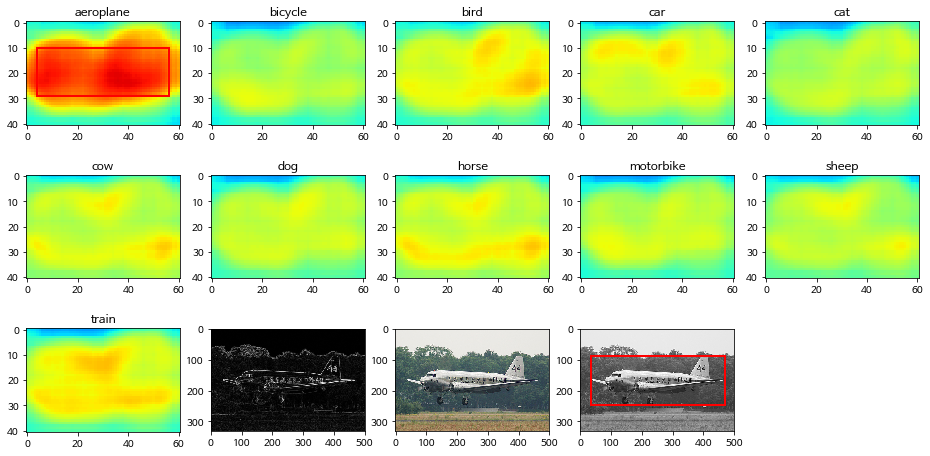

In [53]:
import matplotlib.patches as patches

try: iii+=1
except: iii=0
    
heatmap, boxes_gt, targets, origImg, resn_f, edge = getData(indices_train[iii])
print('[AREA gt]', boxes_gt[:,2]*boxes_gt[:,3])
print(heatmap.shape, boxes_gt.shape, targets.shape)

ker = 1
imgs = heatmap.transpose(0,1)[ker]
# imgs2 = imgs - heatmap.mean(dim=0)[ker] # 전체 평균 빼기
imgs2 = nn.functional.normalize(imgs, dim=0)
boxes_gt = boxes_gt.cpu().numpy()
boxes_gt_heatmap = cvt_yolobox(boxes_gt, heatmap.shape[-2:])

# Create figure and axes
fig = plt.figure(figsize=(16,8))
for i in range(len(allowedList)):
    ax = fig.add_subplot(3,5, i+1)
    imgplot = ax.imshow(imgs[i].cpu(), cmap='jet')
    imgplot.set_clim(0,1)
    plt.title(allowedClass[i])

    for t,box in zip(targets, boxes_gt_heatmap):
        if t[i].item()==1:
            # Create GT Rectangle patch
                x1,y1,w1,h1 = box
                rect = patches.Rectangle((x1,y1),w1,h1, linewidth=2,edgecolor='r',facecolor='none')
                # Add the patch to the Axes
                ax.add_patch(rect)

# edge
ax = fig.add_subplot(3,5, len(allowedList)+1)
plt.imshow(edge.squeeze().cpu(), cmap='gray')
# original picture                
ax = fig.add_subplot(3,5, len(allowedList)+2)
ax.imshow(origImg.permute(1,2,0))
ax = fig.add_subplot(3,5, len(allowedList)+3)
ax.imshow(cvtGray(origImg).squeeze(), cmap='gray')
boxes_gt_orig = cvt_yolobox(boxes_gt, origImg.shape[-2:])
for box in boxes_gt_orig:
    # Create GT Rectangle patch
    x1,y1,w1,h1 = box
    rect = patches.Rectangle((x1,y1),w1,h1, linewidth=2,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
                
plt.show()


# # Create figure and axes
# fig = plt.figure(figsize=(16,12))
# for i in range(20):
#     ax = fig.add_subplot(3,5, i+1)
#     imgplot = ax.imshow(imgs2[i].cpu(), cmap='jet')
#     imgplot.set_clim(0,1)  
#     plt.title(voc_classes[i])

#     for t,box in zip(targets, boxes_gt):
#         if t[i].item()==1:
#             # Create GT Rectangle patch
#                 x1,y1,w1,h1 = box
#                 rect = patches.Rectangle((x1,y1),w1,h1, linewidth=2,edgecolor='r',facecolor='none')
#                 # Add the patch to the Axes
#                 ax.add_patch(rect)
# plt.show()

---
#  
#  
# train

In [16]:
def makeMask(nx, ny):
    # make 14x14 center coords
    x_range = np.linspace(0,1,nx+1)
    y_range = np.linspace(0,1,ny+1)
    X, Y = np.meshgrid(x_range, y_range)
    C = np.array([list(zip(x, y)) for x, y in zip(X, Y)])
    EDGES = C[:ny,:nx].reshape(-1,2)

    CC = []
    for x in range(C.shape[0]-1):
        for y in range(C.shape[1]-1):
            CC.append((C[x][y]+C[x+1][y+1])/2) # x1,y1,x2,y2
    CENTERS = np.array(CC)
    INTERVAL = [1/nx, 1/ny]
    return EDGES, CENTERS, INTERVAL


def IOU_loss(ious):
    """
    @params ious - N length tensor
    배치 하나당 0.3 정도가 약 0.5 IOU---
    """
    loss = -1 * (ious +1e-9).log() 
    return loss.sum()

def cvt_yolobox_tensor(bboxes_yolo, size):
    """
    size - original [w,h]
    np.array
    yolo(cx,cy,w,h) to x,y,x2,y2
    """
    bboxes = bboxes_yolo.clone() # x,y,w,h

    bboxes[:,0] = (bboxes_yolo[:,0] - bboxes_yolo[:,2]/2)*size[1] # x
    bboxes[:,1] = (bboxes_yolo[:,1] - bboxes_yolo[:,3]/2)*size[0] # y
    bboxes[:,2] = bboxes_yolo[:,2]*size[1] + bboxes[:,0]
    bboxes[:,3] = bboxes_yolo[:,3]*size[0] + bboxes[:,1]
    return bboxes

def yolo2xxyy(boxes_gt):
    # yolo box to (x1,y1,x2,y2)
    boxes_gt_xxyy = torch.rand_like(boxes_gt) # cx,cy,w,h
    boxes_gt_xxyy[:,0] = boxes_gt[:,0] - boxes_gt[:,2]/2
    boxes_gt_xxyy[:,1] = boxes_gt[:,1] - boxes_gt[:,3]/2
    boxes_gt_xxyy[:,2] = boxes_gt[:,0] + boxes_gt[:,2]/2
    boxes_gt_xxyy[:,3] = boxes_gt[:,1] + boxes_gt[:,3]/2
    return boxes_gt_xxyy # x1,y1,x2,y2

# make 14x14 center coords
x_range = np.linspace(0,1,14+1)
X, Y = np.meshgrid(x_range,x_range)
C = np.array([list(zip(x, y)) for x, y in zip(X, Y)])
EDGES = C[:14,:14].reshape(-1,2)

CC = []
for x in range(C.shape[0]-1):
    for y in range(C.shape[1]-1):
        CC.append((C[x][y]+C[x+1][y+1])/2) # x1,y1,x2,y2
CENTERS = np.array(CC)
INTERVAL = 1/14

criterion_logit = nn.BCEWithLogitsLoss(reduction='mean') # N x cls (one-hot)
def criterion_coord(boxes_pred, boxes_gt, weights=None):
    """
    boxes - N x 4 :  cx,cy,w,h (normalized like Yolo data)
    weights - N
    """
    # bbox coord loss
    _loss = (boxes_pred-boxes_gt).pow(2)
    if(weights is not None):
        _weight = weights.repeat([4,1]).transpose(0,1) # N x 4
        _loss = _loss * _weight
    
    loss_xy = _loss[:,:2] *500
    loss_wh = _loss[:, 2:] *100 
    return loss_xy.mean(), loss_wh.mean()

In [69]:
import time 
import copy

from tensorboardX import SummaryWriter
writer = SummaryWriter()

def train_model(boxModel, criterion_logit, criterion_coord, optimizer, num_epochs=25):
    global loss_list_train, loss_list_val, best_model_wts

    best_model_wts = copy.deepcopy(boxModel.state_dict())
    best_loss = float('inf')
    prev_val_loss = float('inf')
    val_cnt = 0 # val loss 커진 횟수
    decrease_cnt = 0 # lr 줄인 횟수

    for epoch in range(num_epochs):
        since = time.time()
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                boxModel.train()  # Set boxModel to training mode
            else:
                boxModel.eval()   # Set boxModel to evaluate mode

            running_loss = 0.0
            running_loss_logit = 0.0
            running_loss_xy = 0.0
            running_loss_wh = 0.0
            running_corrects = 0
            # Iterate over data.
            for idx, didx in enumerate(dataIndices[phase]):
                heatmap, boxes_gt, targets_gt, origImg, fmap_resn, sobel = getData(didx)
                heatmap = heatmap.to(boxModel.device) # cls x ch x 224 x 224 
                boxes_gt = boxes_gt.to(boxModel.device) # n x 4
                targets_gt = targets_gt.to(boxModel.device) # n x cls

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    logits, boxes_pred, aft_conv_shape = boxModel(heatmap, sobel)
                    boxes_pred_selected = boxes_pred[boxes_gt.argmax(dim=1)] # 모델이 예측한 값중 정답 클래스의 박스값들
                    # cls, 196, 4 -> cls_selected, 196, 4

                    # mask, weight 생성
                    EDGES, CENTERS, INTERVAL = makeMask(*aft_conv_shape)
                    masks = []
                    weights = []
                    boxes_gt_xxyy = yolo2xxyy(boxes_gt)
                    for i in range(len(boxes_gt)):
                        mask = (EDGES[:,0]>boxes_gt_xxyy[i][0].item()-INTERVAL[0])&(EDGES[:,0]<=boxes_gt_xxyy[i][2].item())&(EDGES[:,1]>boxes_gt_xxyy[i][1].item()-INTERVAL[1])&(EDGES[:,1]<=boxes_gt_xxyy[i][3].item())
                        weight = np.apply_along_axis(lambda c: (1 - np.linalg.norm(c-boxes_gt[i][:2].cpu().numpy())), 1, CENTERS)
                        masks.append(mask)
                        weights.append(weight)
                    masks = torch.tensor(masks).to(boxModel.device)
                    weights = torch.tensor(weights).pow(4).cuda(boxModel.device) # 거리 4제곱 반비례 [0~1]

                    loss = torch.tensor(0).double().cuda()
                    for i in range(len(targets_gt)):
                        # 동적으로 가중치 변경해가며 BCE loss
                        loss_logit = torch.tensor(0).double().cuda()
                        for p,g,w in zip(logits[:, masks[i]].transpose(0,1), targets_gt[i].repeat(masks.sum(dim=1)[i],1), weights[i][masks[i]]):
                            l = criterion_logit(p,g)*w
                            loss_logit += l
#                         loss_xy, loss_wh = criterion_coord(boxes_pred_selected[i][masks[i]], boxes_gt[i].repeat(masks.sum(dim=1)[i],1), weights[i][masks[i]])
                            #  bbox center와 가장 가까운 셀만 사용
                            loss_xy, loss_wh = criterion_coord(boxes_pred_selected[i][[weights[i].argmax().item()]], boxes_gt[[i]])
                        loss = loss + loss_logit +loss_xy + loss_wh

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.float().backward()
                        optimizer.step()

                # statistics
                running_loss_logit += loss_logit.item()
                running_loss_xy += loss_xy.item()
                running_loss_wh += loss_wh.item()
                running_loss += loss.item()
                
                # mini batch statistics
                if idx>0 and idx%10==0:
                    cnt = idx
                    print('[batch]{}, {} Loss_l: {:.4f}, Loss_xy: {:.4f}, Loss_wh: {:.4f}, Acc: {:.4f}'.format(
                        cnt, phase, running_loss_logit/cnt, running_loss_xy/cnt, running_loss_wh/cnt, running_corrects/cnt))
#                     writer.add_scalar('loss_%s/loss_logit'%phase, running_loss_logit/cnt, cnt+epoch*dataset_sizes[phase])
#                     writer.add_scalar('loss_%s/loss_xy'%phase, running_loss_xy/cnt, cnt+epoch*dataset_sizes[phase])
#                     writer.add_scalar('loss_%s/loss_wh'%phase, running_loss_wh/cnt, cnt+epoch*dataset_sizes[phase])
#                     writer.add_scalar('loss_%s/loss_all'%phase, running_loss/cnt, cnt+epoch*dataset_sizes[phase])
                    writer.add_scalars('loss_%s/loss_logit'%phase, {'Loss':running_loss_logit/cnt}, cnt+epoch*dataset_sizes[phase])
                    writer.add_scalars('loss_%s/loss_xy'%phase, {'Loss':running_loss_xy/cnt}, cnt+epoch*dataset_sizes[phase])
                    writer.add_scalars('loss_%s/loss_wh'%phase, {'Loss':running_loss_wh/cnt}, cnt+epoch*dataset_sizes[phase])
                    writer.add_scalars('loss_%s/loss_all'%phase, {'Loss':running_loss/cnt}, cnt+epoch*dataset_sizes[phase])

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            # detail
            loss_xy_list[phase].append(running_loss_xy/dataset_sizes[phase])
            loss_wh_list[phase].append(running_loss_wh/dataset_sizes[phase])
            loss_logit_list[phase].append(running_loss_logit/dataset_sizes[phase])       
            writer.add_scalars('epoch_loss_%s/loss_xy'%phase, {'Loss':running_loss_xy/dataset_sizes[phase]}, epoch)
            writer.add_scalars('epoch_loss_%s/loss_wh'%phase, {'Loss':running_loss_xy/dataset_sizes[phase]}, epoch)
            writer.add_scalars('epoch_loss_%s/loss_logit'%phase, {'Loss':running_loss_xy/dataset_sizes[phase]}, epoch)
            writer.add_scalars('epoch_loss_%s/loss_all'%phase, {'Loss':running_loss/dataset_sizes[phase]}, epoch)


            # all
            loss_list[phase].append(epoch_loss)
            acc_list[phase].append(epoch_acc)

            print('{} Loss: {:.4f}, Acc: {:.4f}, lr: {}, BestLoss: {:.4f}'.format(
                phase, epoch_loss, epoch_acc, optimizer.param_groups[0]['lr'], best_loss))

            # deep copy the boxModel
            if phase == 'val' and epoch_loss < best_loss:
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(boxModel.state_dict())
                
                # save boxModel
                torch.save(boxModel.state_dict(), 'torch_models/heatmap-5chan-multi-1204-%d.pth'%epoch)
                
#             # for lr decay
#             if phase == 'val' and epoch_loss < prev_val_loss:
                val_cnt = 0                
            elif phase == 'val' and epoch_loss >= best_loss:
                val_cnt += 1
            
            if phase == 'val':
                prev_val_loss = epoch_loss
                
        # decay 0.2 per 2 chance        
        if(val_cnt==1):  # 2번 안내려가면 러닝레이트 내림
            val_cnt = 0
            decrease_cnt += 1
            for g in optimizer.param_groups:
                g['lr'] = g['lr']*0.2
                print('****** lr decrease ******')
                print('[decrease_cnt]:', decrease_cnt, ', [lr]:', g['lr'])
                print('[Load best weight]')
                boxModel.load_state_dict(best_model_wts)
                
        if(decrease_cnt==5): # 학습 멈춤
            print('###### early stop #####')
            break
            

        time_elapsed = time.time() - since
        print('Training epoch duration is {:.0f}m {:.0f}s'.format(
            time_elapsed // 60, time_elapsed % 60))
    print('Best val loss: {:4f}'.format(best_loss))

    # load best boxModel weights
    boxModel.load_state_dict(best_model_wts)
    return boxModel    

In [70]:
class BoxMaker(nn.Module):
    def __init__(self):
        super(BoxMaker, self).__init__()
        global_average_pooling = torch.nn.AdaptiveAvgPool2d(output_size=(1, 1))
        flatten = Flatten()
        
        # backbone layer
        self.backbone = nn.Sequential(
            # 1x1 conv
            nn.Conv2d(5, 32, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256, kernel_size=(3,3), stride=(1, 1), padding=(1,1)),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # b*cls x 256 x 14 x 14
            # global_average_pooling, # n x 256 x 1 x 1
            # flatten, # n x 256
        )
        
        self.backbone2 = nn.Sequential(
            # 1x1 conv
            nn.Conv2d(5, 32, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 128, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128, 256, kernel_size=(3,3), stride=(1, 1), padding=(2,2), dilation=2),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.MaxPool2d(2,2), # b*cls x 256 x 14 x 14
        )
        
        self.gap = nn.Sequential(
            global_average_pooling, # b*cls x 256 x 1 x 1
            flatten, # b*cls x 256          
        )      
        
        # fc layer
        self.fc = nn.Sequential(
            nn.Linear(256, 512), # b*cls x 256
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 196), # b*cls x 196
        )
        
        self.multihead_attn = nn.MultiheadAttention(embed_dim=512, num_heads=8)
                        
        self.onecv = nn.Sequential(
            # 1x1 conv
            nn.Conv2d(512, 256, kernel_size=(5,5), padding=(4,4), dilation=2),
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),
            nn.Conv2d(256, 64, kernel_size=(5,5), padding=(4,4), dilation=2),
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True),
            nn.ReLU(),       
            nn.Conv2d(64, 5, kernel_size=(5,5), padding=(4,4), dilation=2),
        )
        
        
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

        
    def forward(self, inputs, edge):
        """
        inputs - cls,ch,h,w
        edge  - 1,1,h,w
        디텍터는 한번에 한 프레임밖에 안됨
        """
        n_cls = inputs.shape[0]
        # CNN backbone
        images = inputs # cls,ch,h,w
        hhr = torch.cat([edge]*n_cls) # cls x 1 x h x w
        hhr2 = nn.functional.interpolate(hhr, [224,224]) # cls x 12 x 224 x 224


        images_all = nn.functional.interpolate(images, [224,224]) # cls x 12 x 224 x 224
        images_all2 = torch.cat([images_all,hhr2], dim=1) # cls x 12 x h x w

        hh = self.backbone(images_all2) # cls x 256 x 14 x 14
        hh2 = self.backbone2(images_all2) # cls x 256 x 14 x 14
        
        # --------------
        kk = self.gap(hh) # cls x 256
        kk2 = self.gap(hh2) # cls x 256
        kk3 = kk + kk2
        kk4 = self.fc(kk3) # cls x 196
        
        kk5 = torch.stack([kk4]*512, dim=2) # cls x 196 x 512
        # --------------

        aft_conv_shape = hh.shape[-2:]
        aft_conv_flat = aft_conv_shape[0]*aft_conv_shape[1] # 14 x 14 where 224 input 
        
        hh = hh.reshape(-1, 256, aft_conv_flat) # cls x 256 x aft_conv_flat
        hh2 = hh2.reshape(-1, 256, aft_conv_flat) # cls x 256 x aft_conv_flat
        
        hh3 = torch.cat([hh,hh2], dim=1) # cls x 512 x aft_conv_flat
        hh3 = hh3.transpose(1,2) # cls x aft_conv_flat x 512
        
        # -------------
        hh3 = hh3+kk5
        # -------------
        attn_output, attn_output_weights = self.multihead_attn(hh3, hh3, hh3) # q,k,v - Seq,Batch,Embed - cls,aft_conv_flat,512       
        attn_sum = hh3+attn_output # cls x aft_conv_flat x 512
        
        res = attn_sum.transpose(1,2) # cls x 512 x aft_conv_flat

        res2 = res.reshape(-1,512, *aft_conv_shape) # cls x 512 x 14 x 14 - for conv 
        
#         print('<<<', res2.shape)
        pp = self.onecv(res2) # cls x 5(1+4) x 14 x 14
#         print('<<>>', pp.shape)
        pp = pp.transpose(2,1) # cls x 14 x 14 x 5(1+4)
        pp = pp.reshape(-1,aft_conv_flat,5)
        logit = pp[:,:,0] # cls x aft_conv_flat
        coords = pp[:,:,1:] # cls x aft_conv_flat x 4
        
        return logit, coords, aft_conv_shape

In [71]:
boxMaker = BoxMaker()
boxMaker.to(boxMaker.device)
# boxMaker.load_state_dict(torch.load('torch_models/heatmap-21-1130.pth', map_location='cuda:0'))
# boxMaker.load_state_dict(torch.load('torch_models/heatmap-edge2-1129.pth', map_location='cuda:0'))
# boxMaker.eval()
print()

In [72]:
loss_xy_list = {'train':[], 'val':[]}
loss_wh_list = {'train':[], 'val':[]}
loss_logit_list = {'train':[], 'val':[]}

loss_list = {'train':[], 'val':[]}
acc_list = {'train':[], 'val':[]}
best_model_wts = None

# Observe that only parameters of final layer are bkeing optimized as
# optimizer = optim.SGD(params, lr=0.001, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Decay LR by a factor of 0.1 every 3 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

In [73]:
# Set seed
torch.manual_seed(777)
boxMaker = train_model(boxMaker, criterion_logit, criterion_coord, optimizer, num_epochs=50)

Epoch 1/50
----------
[batch]10, train Loss_l: 19.5247, Loss_xy: 196.2007, Loss_wh: 52.1946, Acc: 0.0000
[batch]20, train Loss_l: 18.2862, Loss_xy: 206.3626, Loss_wh: 55.6666, Acc: 0.0000
[batch]30, train Loss_l: 18.2508, Loss_xy: 236.1492, Loss_wh: 53.2285, Acc: 0.0000
[batch]40, train Loss_l: 18.7132, Loss_xy: 228.0314, Loss_wh: 52.7316, Acc: 0.0000
[batch]50, train Loss_l: 17.8342, Loss_xy: 216.2152, Loss_wh: 51.7635, Acc: 0.0000
[batch]60, train Loss_l: 17.3296, Loss_xy: 219.9305, Loss_wh: 50.3958, Acc: 0.0000
[batch]70, train Loss_l: 16.9010, Loss_xy: 227.9681, Loss_wh: 47.8570, Acc: 0.0000
[batch]80, train Loss_l: 17.2647, Loss_xy: 227.3164, Loss_wh: 50.7743, Acc: 0.0000
[batch]90, train Loss_l: 17.1632, Loss_xy: 229.1416, Loss_wh: 50.7382, Acc: 0.0000
[batch]100, train Loss_l: 17.1587, Loss_xy: 224.4080, Loss_wh: 52.0631, Acc: 0.0000
[batch]110, train Loss_l: 16.9248, Loss_xy: 222.5586, Loss_wh: 51.5090, Acc: 0.0000
[batch]120, train Loss_l: 17.0185, Loss_xy: 221.5613, Loss_wh: 

[batch]1940, train Loss_l: 16.3852, Loss_xy: 228.2144, Loss_wh: 51.4625, Acc: 0.0000
[batch]1950, train Loss_l: 16.3769, Loss_xy: 228.3176, Loss_wh: 51.5672, Acc: 0.0000
[batch]1960, train Loss_l: 16.3803, Loss_xy: 228.2971, Loss_wh: 51.5375, Acc: 0.0000
[batch]1970, train Loss_l: 16.3815, Loss_xy: 228.4687, Loss_wh: 51.6362, Acc: 0.0000
[batch]1980, train Loss_l: 16.3871, Loss_xy: 228.0507, Loss_wh: 51.5768, Acc: 0.0000
[batch]1990, train Loss_l: 16.3892, Loss_xy: 228.2610, Loss_wh: 51.7065, Acc: 0.0000
[batch]2000, train Loss_l: 16.3786, Loss_xy: 228.4474, Loss_wh: 51.7107, Acc: 0.0000
[batch]2010, train Loss_l: 16.3764, Loss_xy: 228.8298, Loss_wh: 51.7854, Acc: 0.0000
[batch]2020, train Loss_l: 16.3728, Loss_xy: 228.8477, Loss_wh: 51.7386, Acc: 0.0000
[batch]2030, train Loss_l: 16.3749, Loss_xy: 228.9677, Loss_wh: 51.7167, Acc: 0.0000
[batch]2040, train Loss_l: 16.3743, Loss_xy: 228.6187, Loss_wh: 51.7076, Acc: 0.0000
[batch]2050, train Loss_l: 16.3779, Loss_xy: 228.7929, Loss_wh: 5

[batch]630, train Loss_l: 16.7090, Loss_xy: 224.1674, Loss_wh: 52.7174, Acc: 0.0000
[batch]640, train Loss_l: 16.6794, Loss_xy: 223.8651, Loss_wh: 52.4352, Acc: 0.0000
[batch]650, train Loss_l: 16.6807, Loss_xy: 225.4297, Loss_wh: 52.4030, Acc: 0.0000
[batch]660, train Loss_l: 16.6791, Loss_xy: 225.4178, Loss_wh: 52.1492, Acc: 0.0000
[batch]670, train Loss_l: 16.7594, Loss_xy: 223.6946, Loss_wh: 52.1423, Acc: 0.0000
[batch]680, train Loss_l: 16.7449, Loss_xy: 223.0866, Loss_wh: 52.0290, Acc: 0.0000
[batch]690, train Loss_l: 16.7388, Loss_xy: 223.6519, Loss_wh: 52.1638, Acc: 0.0000
[batch]700, train Loss_l: 16.6873, Loss_xy: 225.3183, Loss_wh: 52.1442, Acc: 0.0000
[batch]710, train Loss_l: 16.6858, Loss_xy: 224.7518, Loss_wh: 52.0503, Acc: 0.0000
[batch]720, train Loss_l: 16.6406, Loss_xy: 225.7303, Loss_wh: 51.9744, Acc: 0.0000
[batch]730, train Loss_l: 16.6564, Loss_xy: 224.6290, Loss_wh: 51.6976, Acc: 0.0000
[batch]740, train Loss_l: 16.6673, Loss_xy: 225.0827, Loss_wh: 51.9551, Acc:

KeyboardInterrupt: 

In [20]:
# torch.save(boxMaker.state_dict(), 'torch_models/heatmap-5chan-multi-1206.pth')
boxMaker.load_state_dict(torch.load('torch_models/heatmap-5chan-multi-1206.pth', map_location='cuda:0'))
boxMaker.eval()

BoxMaker(
  (backbone): Sequential(
    (0): Conv2d(5, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [80]:
(logits>0.7).sum(dim=1) , targets
# box_dict
# logits.shape, boxes_pred.max()

(tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0], device='cuda:0'),
 tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]))

In [81]:
print(logits.reshape(-1,14,14)[4].detach().cpu().numpy().round(1))

[[0.4 0.4 0.6 0.4 0.6 0.4 0.5 0.4 0.4 0.4 0.4 0.3 0.6 0.5]
 [0.5 0.5 0.5 0.4 0.5 0.5 0.5 0.5 0.5 0.5 0.4 0.3 0.5 0.6]
 [0.4 0.5 0.5 0.4 0.6 0.5 0.4 0.5 0.4 0.4 0.4 0.6 0.6 0.5]
 [0.5 0.5 0.4 0.5 0.5 0.5 0.3 0.5 0.4 0.4 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.4 0.5 0.4 0.5 0.5 0.4 0.4 0.6 0.5 0.5 0.7 0.5]
 [0.5 0.6 0.5 0.4 0.7 0.7 0.4 0.5 0.4 0.6 0.5 0.4 0.6 0.4]
 [0.5 0.5 0.7 0.5 0.6 0.5 0.5 0.5 0.4 0.4 0.4 0.4 0.6 0.4]
 [0.5 0.5 0.6 0.4 0.6 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.6 0.4]
 [0.5 0.5 0.5 0.5 0.6 0.6 0.5 0.4 0.4 0.5 0.3 0.4 0.7 0.5]
 [0.5 0.6 0.6 0.6 0.5 0.7 0.6 0.5 0.5 0.5 0.6 0.4 0.7 0.5]
 [0.5 0.5 0.5 0.6 0.5 0.6 0.4 0.5 0.4 0.5 0.6 0.5 0.5 0.6]
 [0.4 0.6 0.5 0.5 0.6 0.5 0.4 0.6 0.4 0.5 0.6 0.4 0.5 0.4]
 [0.5 0.5 0.5 0.5 0.6 0.6 0.4 0.5 0.5 0.6 0.5 0.5 0.6 0.5]
 [0.5 0.6 0.5 0.5 0.6 0.6 0.4 0.5 0.5 0.6 0.6 0.5 0.5 0.5]]


[AREA gt] [0.12829841 0.01028571 0.26714286]
[Target]: aeroplane
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


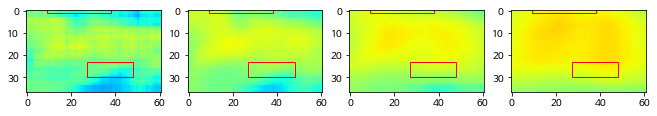

[Target]: bicycle
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


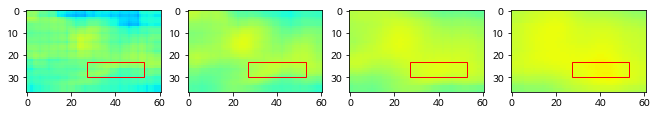

[Target]: bird
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


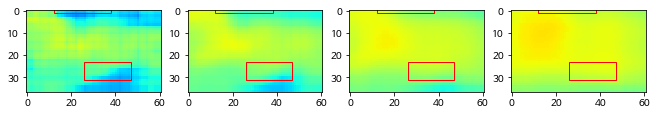

[Target]: car
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


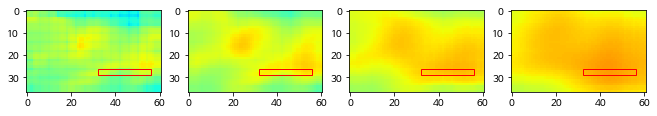

[Target]: cat
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


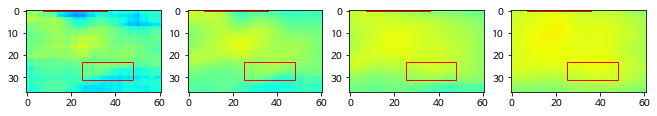

[Target]: cow
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


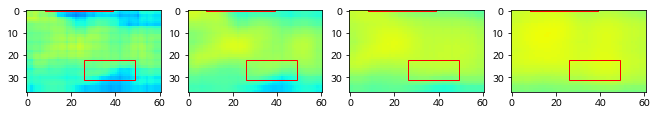

[Target]: dog
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


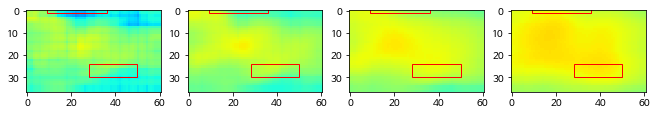

[Target]: horse
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


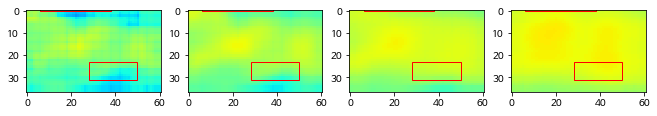

[Target]: motorbike
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


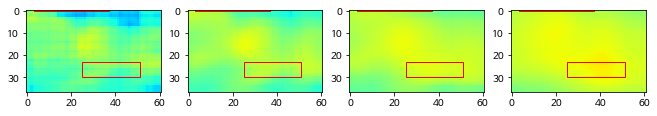

[Target]: sheep
[n_gt_box]: 0 [n_adj_box]: 2
[NMS]: 2


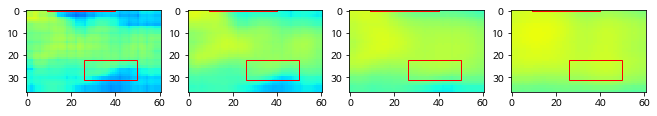

[Target]: train
[n_gt_box]: 3 [n_adj_box]: 0


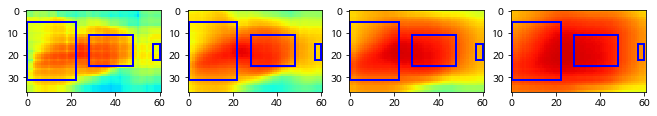

In [79]:
import matplotlib.patches as patches


# classes = ['aeroplane', 'bicycle', 'bird', 'car', 'cat', 'cow', 'dog', 'horse', 'motorbike', 'sheep', 'train']
# heatmap, boxes_gt, targets = loader.next()

try: iii+=1
except: iii=0
    
heatmap, boxes_gt, targets, origImg, resn_f, edge = getData(indices_val[iii])

boxes_gt = boxes_gt.cpu().numpy()
print('[AREA gt]', boxes_gt[:,2]*boxes_gt[:,3])
boxes_gt = cvt_yolobox(boxes_gt, heatmap.shape[-2:])
logits, boxes_pred, _ = boxMaker(heatmap.to(boxMaker.device), edge)
logits = logits.sigmoid()

# 정답 박스값 가져오기
# box_dict= {t:{'gt':[], 'adj':[]} for t in set(targets.argmax(dim=1).numpy())}
box_dict= {t:{'gt':[], 'adj':[]} for t in range(targets.shape[-1])} # 모든 클래스에 대해 일단 생성
for t,b in zip(targets.argmax(dim=1).numpy(), boxes_gt):
    box_dict[t]['gt'].append(b)
box_dict[t]['gt'] = np.array(box_dict[t]['gt'])

# 모델 예측 박스값 가져오기
threshold = 0.7
for idx, cnt in enumerate((logits>threshold).sum(dim=1)):
    if(cnt>0):
#         boxes_adj = boxes_pred[idx][logits[idx].data.cpu().numpy()>threshold].data
        logits_adj = logits[idx][logits[idx]>threshold].data
        boxes_adj = cvt_yolobox(boxes_pred[idx][logits[idx]>threshold].data.cpu().numpy(), 
                                heatmap.shape[-2:])
        box_dict[idx]['adj'] = boxes_adj
        box_dict[idx]['logits'] = logits_adj
       
        
# ------------ Display the image and GT boxes ------------
for t in box_dict: # 프레임 내의 개별 target 개수로 반복
    if(len(box_dict[t]['adj'])==0 and len(box_dict[t]['gt'])==0): continue # gt, pred모두 하나도 없으면 넘기기
    print('[Target]:', allowedClass[t])
    print('[n_gt_box]:', len(box_dict[t]['gt']), '[n_adj_box]:', len(box_dict[t]['adj']))
    imgs = heatmap[t]

    box_nms = []
    if(len(box_dict[t]['adj'])>0): # pred box가 있을때만
        # NMS
        bbb = torch.tensor(box_dict[t]['adj']).float() # N x 4 (x1,x2,y1,y2)로 들어가야해서 box_cvt적용
        sss = box_dict[t]['logits'].cpu()
        keeps = torchvision.ops.nms(box_cvt(bbb), sss, iou_threshold=0.5)
        print('[NMS]:', len(keeps))
        box_nms = bbb[keeps]
            
    # Create figure and axes
    fig = plt.figure(figsize=(14,4))
    for i in range(4):
        ax = fig.add_subplot(1,5, i+1)
#         if(i==4): imgplot = ax.imshow(imgs[i].cpu(), cmap='gray')
#         else: 
        imgplot = ax.imshow(imgs[i].cpu(), cmap='jet')
        imgplot.set_clim(0,1)

        # Create GT Rectangle patch
        for x1,y1,w1,h1 in box_dict[t]['gt']:
            rect = patches.Rectangle((x1,y1),w1,h1, linewidth=2,edgecolor='b',facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)
            
        # Create pred_adj Rectangle patch
#         for x1,y1,w1,h1 in box_dict[t]['adj']:
        for x1,y1,w1,h1 in box_nms:
            rect = patches.Rectangle((x1,y1),w1,h1, linewidth=1,edgecolor='r',facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)        
    plt.show()

---
#  
#  
# Detecter Performance

NanumBarunGothic


In [11]:
import time
#  ref - floor, frontview, office // val - floor2, frontview2, wall
# validation_21, reference_21_train // reference_21_val // all_10
# 21 10 바꾸기 주의, MyDataset도 바꿔야함 -10 해야함
root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\reference_21_train'
class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_21.names'

# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = MyDataset(root_dir, class_path, 
        transform=transforms.Compose([
        transforms.ToTensor()
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
SHOW_IMAGE = False # 이미지 볼지 말지
target_all = [] #ground truth bboxs`
heat_all = []
box_yolo_all = []
sobel_all = []

# print('[num_class]:', len(sample_dir_list), sample_dir_list)
for i in tqdm(np.random.permutation(len(voc_val_dataset))):
# for i in tqdm(range(len(voc_val_dataset))):
    startTime = time.time()
    data, targets_gt, boxes_gt, boxes_gt_yolo = voc_val_dataset[i] # 정답 데이터, 레이블, bbox

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)

    _data = nn.UpsamplingNearest2d([224,224])(data)
    data_sobel = sobel(_data.cuda())
    
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.33, 0.33))
    sobel_all.append(data_sobel[0].cpu().data)
    heat_all.append(preds_dist.cpu().data) # heatmap
    box_yolo_all.append(boxes_gt_yolo)
    target_all.append(targets_gt)
        
    # only render UI
    if SHOW_IMAGE:
        # frame = cv2.resize(frame, (int(frame.shape[1]*1.5), int(frame.shape[0]*1.5)), interpolation=cv2.INTER_CUBIC)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(0) & 0xff 
        if k == 27: # esc
            break

    endTime = time.time()
    fps = int(1/(endTime - startTime))
    
cv2.destroyAllWindows()

A Jupyter Widget

<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
<featuremaps-shape> torch.Size([1, 2048, 17, 30])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 49 88 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 788

KeyboardInterrupt: 

In [ ]:
a = []
for b in box_yolo_all:
    x,y,w,h = b[0]
    a.append(w*h)

In [33]:
aa=pd.Series(a)
aa.describe()

count    156.000000
mean       0.058132
std        0.032553
min        0.014853
25%        0.035764
50%        0.049418
75%        0.071732
max        0.170531
dtype: float64

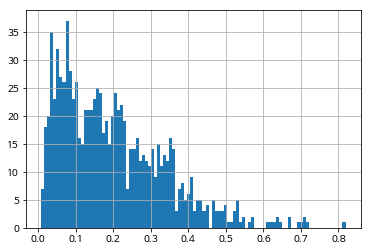

In [29]:
aa.hist(bins=100)
plt.show()

In [12]:
import time
#  ref - floor, frontview, office // val - floor2, frontview2, wall
# validation_21, reference_21_train // reference_21_val // all_10
# 21 10 바꾸기 주의, MyDataset도 바꿔야함 -10 해야함
root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\reference_21_train'
class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_21.names'

# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = MyDataset(root_dir, class_path, 
        transform=transforms.Compose([
        transforms.ToTensor()
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
SHOW_IMAGE = False # 이미지 볼지 말지
target_all = [] #ground truth bboxs`
heat_all = []
box_yolo_all = []
sobel_all = []

# print('[num_class]:', len(sample_dir_list), sample_dir_list)
for i in tqdm(np.random.permutation(len(voc_val_dataset))):
# for i in tqdm(range(len(voc_val_dataset))):
    startTime = time.time()
    data, targets_gt, boxes_gt, boxes_gt_yolo = voc_val_dataset[i] # 정답 데이터, 레이블, bbox

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)

    _data = nn.UpsamplingNearest2d([224,224])(data)
    data_sobel = sobel(_data.cuda())
    
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.33, 0.33), upsample=True)
    sobel_all.append(data_sobel[0].cpu().data)
    heat_all.append(preds_dist.cpu().data) # heatmap
    box_yolo_all.append(boxes_gt_yolo)
    target_all.append(targets_gt)
        
    # only render UI
    if SHOW_IMAGE:
        # frame = cv2.resize(frame, (int(frame.shape[1]*1.5), int(frame.shape[0]*1.5)), interpolation=cv2.INTER_CUBIC)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(0) & 0xff 
        if k == 27: # esc
            break

    endTime = time.time()
    fps = int(1/(endTime - startTime))
    
cv2.destroyAllWindows()

A Jupyter Widget

<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_b

KeyboardInterrupt: 

******* 3 2 (6, 2) (6, 2)


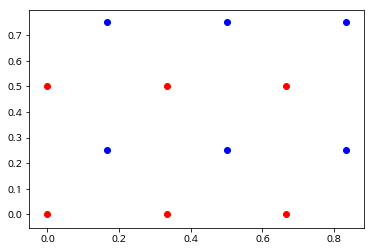

In [68]:
e,c,i = makeMask(3,2)
plt.scatter(e[:,0], e[:,1], c='r')
plt.scatter(c[:,0], c[:,1], c='b')

plt.show()

In [9]:
def IOU_loss(ious):
    """
    @params ious - N length tensor
    배치 하나당 0.3 정도가 약 0.5 IOU---
    """
    loss = -1 * (ious +1e-9).log() 
    return loss.sum()

def cvt_yolobox_tensor(bboxes_yolo, size):
    """
    size - original [w,h]
    np.array
    yolo(cx,cy,w,h) to x,y,x2,y2
    """
    bboxes = bboxes_yolo.clone() # x,y,w,h

    bboxes[:,0] = (bboxes_yolo[:,0] - bboxes_yolo[:,2]/2)*size[1] # x
    bboxes[:,1] = (bboxes_yolo[:,1] - bboxes_yolo[:,3]/2)*size[0] # y
    bboxes[:,2] = bboxes_yolo[:,2]*size[1] + bboxes[:,0]
    bboxes[:,3] = bboxes_yolo[:,3]*size[0] + bboxes[:,1]
    return bboxes

def yolo2xxyy(boxes_gt):
    # yolo box to (x1,y1,x2,y2)
    boxes_gt_xxyy = torch.rand_like(boxes_gt) # cx,cy,w,h
    boxes_gt_xxyy[:,0] = boxes_gt[:,0] - boxes_gt[:,2]/2
    boxes_gt_xxyy[:,1] = boxes_gt[:,1] - boxes_gt[:,3]/2
    boxes_gt_xxyy[:,2] = boxes_gt[:,0] + boxes_gt[:,2]/2
    boxes_gt_xxyy[:,3] = boxes_gt[:,1] + boxes_gt[:,3]/2
    return boxes_gt_xxyy # x1,y1,x2,y2

# make 14x14 center coords
x_range = np.linspace(0,1,14+1)
X, Y = np.meshgrid(x_range,x_range)
C = np.array([list(zip(x, y)) for x, y in zip(X, Y)])
EDGES = C[:14,:14].reshape(-1,2)

CC = []
for x in range(C.shape[0]-1):
    for y in range(C.shape[1]-1):
        CC.append((C[x][y]+C[x+1][y+1])/2) # x1,y1,x2,y2
CENTERS = np.array(CC)
INTERVAL = 1/14

criterion_logit = nn.BCEWithLogitsLoss(reduction='mean') # N x cls (one-hot)
def criterion_coord(boxes_pred, boxes_gt, weights=None):
    """
    boxes - N x 4 :  cx,cy,w,h (normalized like Yolo data)
    weights - N
    """
    # bbox coord loss
    _loss = (boxes_pred-boxes_gt).pow(2)
    if(weights is not None):
        _weight = weights.repeat([4,1]).transpose(0,1) # N x 4
        _loss = _loss * _weight
    
    loss_xy = _loss[:,:2] *1000
    loss_wh = _loss[:, 2:] *100 
    return loss_xy.mean(), loss_wh.mean()

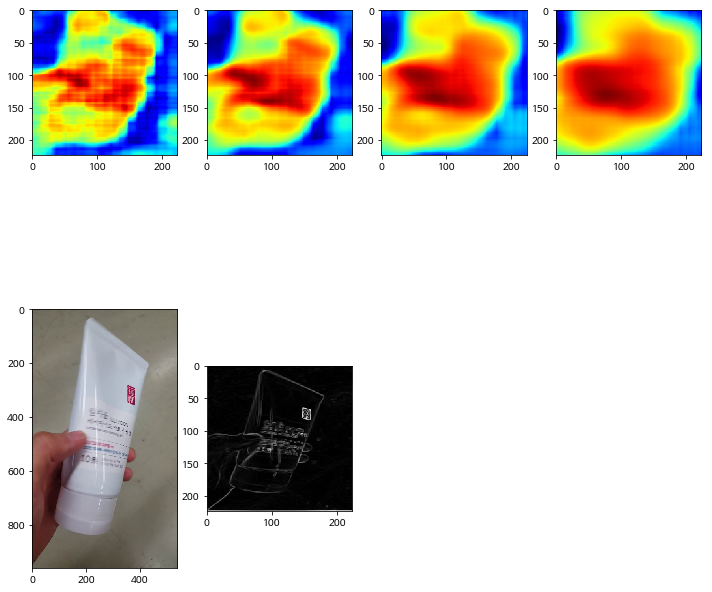

In [19]:
# Create figure and axes
plt.figure(figsize=(12,12))
for i,p in enumerate(preds_dist[0]):
    plt.subplot(2,4,i+1)
    plt.imshow(p.cpu().numpy(), cmap='jet')
    
plt.subplot(2,4,5)
plt.imshow(frame[:,:,::-1])

plt.subplot(2,4,6)
_data = nn.UpsamplingNearest2d([224,224])(data)
data_sobel = sobel(_data.cuda())
plt.imshow(data_sobel[0][0].cpu().numpy(), cmap='gray')
torchvision.utils.save_image(data_sobel, 'foo.jpg')
plt.show()

******* 3 4 (12, 2) (12, 2)


In [18]:
torchvision.utils.save_image(_data, 'foo.jpg')

In [34]:
len(sobel_all)

torch.Size([1, 1, 224, 224])

In [16]:
# save pickle data
import pickle

hmaps = heat_all
data_train = {
    'heatmaps': hmaps,
    'sobels': sobel_all,
    'boxes': np.stack(box_yolo_all),
    'targets': np.stack(target_all),
}

pickle.dump(data_train, open("heatmap_21_1130.pickle", 'wb'), protocol=4)

del hmaps

In [13]:
# save pickle data
import pickle

hmaps = heat_all
data_val = {
    'heatmaps': hmaps,
    'sobels': sobel_all,
    'boxes': np.stack(box_yolo_all),
    'targets': np.stack(target_all),
}
pickle.dump(data_val, open("heatmap_21_1130_val.pickle", 'wb'), protocol=4)


---
#  
#  
# Show detection result

In [13]:
def concatSobel(preds_dist, data):
    """
    기존 히트맵 채널들과 sobel edge채널 합치기
    preds_dist - cls,ch,h,w
    data - b,3(RGB),h,w
    return - cls,ch+1,h,w
    """
    _data = nn.UpsamplingNearest2d([224,224])(data)
    data_sobel = sobel(_data.cuda())
    k = torch.stack([data_sobel[0]]*preds_dist.shape[0])
    return torch.cat([preds_dist, k], dim=1)

# concatSobel(preds_dist, data).shape

In [14]:
# show image
import time
#  ref - floor, frontview, office // val - floor2, frontview2, wall
# validation_21, reference_21_train // reference_21_val // all_10
# 21 10 바꾸기 주의, MyDataset도 바꿔야함 -10 해야함
root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\all_10'#_office'
class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_10.names'
# root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\reference_21'
# class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_21.names'


# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = MyDataset(root_dir, class_path, 
        transform=transforms.Compose([
        transforms.ToTensor()
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# -----------------------`----- val set 정확도 측정 ---------------------------------

fps=0
SHOW_IMAGE = True # 이미지 볼지 말지

# print('[num_class]:', len(sample_dir_list), sample_dir_list)
for i in tqdm(np.random.permutation(len(voc_val_dataset))):
# for i in tqdm(range(len(voc_val_dataset))):
    startTime = time.time()
    data, targets_gt, boxes_gt, boxes_gt_yolo = voc_val_dataset[i] # 정답 데이터, 레이블, bbox

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)

#     preds_dist = textureDetect(featuremaps, filter_size=(3,3), stride=(0.125, 0.125))
#     preds_dist = textureDetect(featuremaps, filter_size=(3,3), stride=(0.33, 0.33), upsample=True)
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.33, 0.33), upsample=True)
    
#     box1, preds_dist = drawTextureRect(n=4, isFirst=True, filter_size=(3,3), stride=(0.33, 0.33))
#     box11, preds_dist = drawTextureRect(n=4, isFirst=True, filter_size=(3,3), stride=(2,2), c=(200,200,255))
    
#     plotHeatMap(preds_dist)
#     # my model

#     logit, boxes_adj = boxMaker(concatSobel(preds_dist, data).unsqueeze(0).data)
    logit, boxes_adj = boxMaker(preds_dist.unsqueeze(0).data)
    pred_d, pred = torch.max(logit, 1)
    print('[Logit]', pred_d.float().sigmoid().item())
    boxes_adj = cvt_yolobox(boxes_adj[:,pred.item()].detach().cpu().numpy(), frame.shape[:2])
    iou = torchvision.ops.box_iou(box_cvt(torch.tensor(boxes_gt).cuda()), 
                        box_cvt(torch.tensor(boxes_adj).cuda())).item()
    print('[IOU]', iou)
    isRight = pred.item()==targets_gt[0]
    res = str(isRight)+' [GT]:'+str(targets_gt[0])+' [Pred]:'+str(pred.item())+' - '+str(pred_d.float().sigmoid().item())[:5]
    print(res)  
    
    gx,gy,gw,gh = boxes_gt[0]
    x,y,w,h = boxes_adj[0]
    cv2.rectangle(frame, (gx,gy), (gx+gw, gy+gh), (255, 0, 0), 1, cv2.LINE_AA)     
    if(isRight): # label 맞춤
        if(iou>0.5): # IOU도 기준 이상 - green
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)     
            cv2.putText(frame, res, (x-3, y-10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,0), 1)
            cv2.putText(frame, '[IOU]: '+str(iou)[:6], (x-3, y-28), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,0), 1)         
        else: # IOU기준 이하 - yello
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 1, cv2.LINE_AA)     
            cv2.putText(frame, res, (x-3, y-10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,255), 1)
            cv2.putText(frame, '[IOU]: '+str(iou)[:6], (x-3, y-28), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,255), 1)            
    else: # label 틀림 - red
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)     
        cv2.putText(frame, res, (x-3, y-10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255), 1)
        cv2.putText(frame, '[IOU]: '+str(iou)[:6], (x-3, y-28), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255), 1)
    
    # only render UI
    if SHOW_IMAGE:
        # frame = cv2.resize(frame, (int(frame.shape[1]*1.5), int(frame.shape[0]*1.5)), interpolation=cv2.INTER_CUBIC)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(0) & 0xff 
        if k == 27: # esc
            break

    endTime = time.time()
    fps = int(1/(endTime - startTime))
        
cv2.destroyAllWindows()

A Jupyter Widget

<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.22672268748283386
[IOU] 0.4293740689754486
False [GT]:5 [Pred]:1 - 0.226
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.29564136266708374
[IOU] 0.3011331260204315
True [GT]:0 [Pred]:0 - 0.295
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.2728775143623352
[IOU] 0.6933621764183044
True [GT]:2 [Pred]:2 - 0.272
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.2472737580537796
[IOU] 0.5869858860969543
True [GT]:3 [Pred]:3 - 0.247


---
#  
#  
# mAP

In [25]:
def calc_tp_state(boxes_ans, boxes_model, confidiences_model, filename=None, threshold_IOU=0.5):
    """
    average precision 계산용 데이터 프레임 리턴
    @params boxes - x,y,w,h
    state_array = [[filename, conf, state, iou], [filename, conf, state, iou], ...]
    threshold_IOU = 0.5 # 이걸 넘어야 TP, 못넘으면 FP
    """
    state_array = []
    for model_box_idx, model_box in enumerate(boxes_model):
        state = [filename, confidiences_model[model_box_idx], 0, 0] # default가 FP
        for ans_box_idx, ans_box in enumerate(boxes_ans):
            _IOU = float(calcIOU(model_box, ans_box))
            if _IOU>threshold_IOU: # IOU넘는게 하나라도 있으면 TP인 경우
                state = [filename, confidiences_model[model_box_idx], 1, _IOU] # default가 FP
                break
            if _IOU>state[3]: state[3]=_IOU # FP경우에도 최고 IOU기록
        state_array.append(state)
    _df = pd.DataFrame(state_array, columns=['image', 'confidience', 'TP', 'IOU'])
    return _df

In [71]:
len(target_all)

7384

In [73]:
# save pickle data`
import pickle

n_train = 7100
hmaps = heat_all #torch.stack(heat_all).cpu().numpy().astype(np.float16)
data_train = {
    'heatmaps': hmaps[:n_train],
    'sobels': sobel_all[:n_train],
    'boxes': box_yolo_all[:n_train],
    'targets': target_all[:n_train],
}
data_val = {
    'heatmaps': hmaps[n_train:],
    'sobels': sobel_all[n_train:],
    'boxes': box_yolo_all[n_train:],
    'targets': target_all[n_train:],
}
pickle.dump(data_train, open("heatmap_voc_multi_1203.pickle", 'wb'), protocol=4)
pickle.dump(data_val, open("heatmap_voc_multi_1203_val.pickle", 'wb'), protocol=4)

del hmaps

# # load
# with open('data.pickle', 'rb') as f:
#     data = pickle.load(f)

In [29]:
import time
#  ref - floor, frontview, office // val - floor2, frontview2, wall
# validation_21, reference_21_train // reference_21_val // all_10
# 21 10 바꾸기 주의, MyDataset도 바꿔야함 -10 해야함
root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\all_10'#_no_office'
class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_10.names'
# root_dir = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\reference_21'
# class_path = 'C:\\Users\\LSW\\Desktop\\Smart_mirror\\Yolo_mark\\x64\\Release\\cosmetic-data\\obj_21.names'


# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = MyDataset(root_dir, class_path, 
        transform=transforms.Compose([
#         myRotation,
#         transforms.RandomRotation(90, expand=True),
        transforms.ToTensor()
    ]))

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

voc_classes = voc_val_dataset.classes
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
SHOW_IMAGE = False # 이미지 볼지 말지
# USE_KNN = False
dfs = {c:pd.DataFrame(columns=['image', 'confidience', 'TP', 'IOU']) for c in voc_classes} # average precision 저장
target_all_mAP = []

target_all = [] #ground truth bboxs`
heat_all = []
box_yolo_all = []

# print('[num_class]:', len(sample_dir_list), sample_dir_list)
for i in tqdm(np.random.permutation(len(voc_val_dataset))):
# for i in tqdm(range(len(voc_val_dataset))):
    startTime = time.time()
    data, targets_gt, boxes_gt, boxes_gt_yolo = voc_val_dataset[i] # 정답 데이터, 레이블, bbox
    target_all_mAP = np.concatenate([target_all_mAP,  targets_gt])

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # opencv image need to convert BGR -> RGB

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)

#     preds_dist = textureDetect(featuremaps, filter_size=(3,3), stride=(0.125, 0.125))
#     preds_dist = textureDetect(featuremaps, filter_size=(3,3), stride=(0.33, 0.33), upsample=True)
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.33, 0.33), upsample=True)
#     heat_all.append(preds_dist.cpu().data) # heatmap
#     box_yolo_all.append(boxes_gt_yolo)
#     target_all.append(targets_gt)
    
#     box1, preds_dist = drawTextureRect(n=4, isFirst=True, filter_size=(3,3), stride=(0.33, 0.33))
#     box11, preds_dist = drawTextureRect(n=4, isFirst=True, filter_size=(3,3), stride=(2,2), c=(200,200,255))
    
#     plotHeatMap(preds_dist)
#     # my model

#     logit, boxes_adj = boxMaker(concatSobel(preds_dist, data).unsqueeze(0).data)
    logit, boxes_adj = boxMaker(preds_dist.unsqueeze(0).data)
    pred_d, pred = torch.max(logit, 1)
    print('[Logit]', pred_d.float().sigmoid().item())
    boxes_adj = cvt_yolobox(boxes_adj[:,pred.item()].detach().cpu().numpy(), frame.shape[:2])
    iou = torchvision.ops.box_iou(box_cvt(torch.tensor(boxes_gt).cuda()), 
                        box_cvt(torch.tensor(boxes_adj).cuda())).item()
    print('[IOU]', iou)
    isRight = pred.item()==targets_gt[0]
    res = str(isRight)+' [GT]:'+str(targets_gt[0])+' [Pred]:'+str(pred.item())+' - '+str(pred_d.float().sigmoid().item())[:5]
    print(res)  
    
#     gx,gy,gw,gh = boxes_gt[0]
#     x,y,w,h = boxes_adj[0]
#     cv2.rectangle(frame, (gx,gy), (gx+gw, gy+gh), (255, 0, 0), 1, cv2.LINE_AA)     
#     if(isRight):
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 1, cv2.LINE_AA)     
#         cv2.putText(frame, res, (x-3, y-12), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,255,255), 1)
#     else:
#         cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 1, cv2.LINE_AA)     
#         cv2.putText(frame, res, (x-3, y-12), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,255), 1)
    
            
    preds_np = pred.cpu().numpy()     
    for t in set(preds_np): # iterate all class // 현재는 하나만
        keep_gt = targets_gt==t
        keep_p = preds_np==t
        _df = calc_tp_state(boxes_gt[keep_gt], boxes_adj[keep_p], pred_d.detach().float().sigmoid().cpu().numpy()[keep_p], 
                            filename='-', threshold_IOU=0.5) # class 하나만 가정, 
        _class = voc_classes[t]
        dfs[_class] = dfs[_class].append(_df, ignore_index=True) # update df             
            
    # only render UI
    if SHOW_IMAGE:
        # frame = cv2.resize(frame, (int(frame.shape[1]*1.5), int(frame.shape[0]*1.5)), interpolation=cv2.INTER_CUBIC)
        cv2.imshow('frame',frame)
        k = cv2.waitKey(0) & 0xff 
        if k == 27: # esc
            break

    endTime = time.time()
    fps = int(1/(endTime - startTime))
        
cv2.destroyAllWindows()        

A Jupyter Widget

<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.5983853340148926
[IOU] 0.3808206617832184
False [GT]:7 [Pred]:4 - 0.598
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.6600225567817688
[IOU] 0.6378776431083679
False [GT]:2 [Pred]:9 - 0.660
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.37333840131759644
[IOU] 0.5450049638748169
True [GT]:4 [Pred]:4 - 0.373
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7246568202972412
[IOU] 0.6812538504600525
False [GT]:4 [Pred]:5 - 0.724
<feat

<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.6968848705291748
[IOU] 0.8217830061912537
True [GT]:8 [Pred]:8 - 0.696
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.8134418725967407
[IOU] 0.6832335591316223
True [GT]:5 [Pred]:5 - 0.813
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9141630530357361
[IOU] 0.6885133981704712
True [GT]:8 [Pred]:8 - 0.914
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.8810927271842957
[IOU] 0.8547863960266113
True [GT]:9 [Pred]:9 - 0.881
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<cl

[IOU] 0.6300162672996521
False [GT]:7 [Pred]:4 - 0.556
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.5127037167549133
[IOU] 0.6520105004310608
True [GT]:6 [Pred]:6 - 0.512
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.34530168771743774
[IOU] 0.8476648926734924
False [GT]:6 [Pred]:3 - 0.345
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.542878270149231
[IOU] 0.6223822236061096
True [GT]:6 [Pred]:6 - 0.542
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.908159971237182

<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.4347527325153351
[IOU] 0.5347074270248413
False [GT]:2 [Pred]:0 - 0.434
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9146429896354675
[IOU] 0.8170475363731384
True [GT]:1 [Pred]:1 - 0.914
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7413042187690735
[IOU] 0.4721073806285858
False [GT]:7 [Pred]:4 - 0.741
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.8574234247207642
[IOU] 0.73785400390625
True [GT]:3 [Pred]:3 - 0.857
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<ro

[IOU] 0.7854447364807129
True [GT]:2 [Pred]:2 - 0.918
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.5840851068496704
[IOU] 0.49187934398651123
True [GT]:1 [Pred]:1 - 0.584
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.7139453887939453
[IOU] 0.4971381723880768
True [GT]:0 [Pred]:0 - 0.713
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.2738146185874939
[IOU] 0.4338948428630829
True [GT]:4 [Pred]:4 - 0.273
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9823011159896851
[IOU]

<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.957976222038269
[IOU] 0.8688133358955383
True [GT]:2 [Pred]:2 - 0.957
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.3498274087905884
[IOU] 0.7156965136528015
False [GT]:6 [Pred]:3 - 0.349
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.738594114780426
[IOU] 0.6897115111351013
True [GT]:4 [Pred]:4 - 0.738
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.9347545504570007
[IOU] 0.570902407169342
True [GT]:8 [Pred]:8 - 0.934
<feat

<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.5298377871513367
[IOU] 0.6202260851860046
False [GT]:4 [Pred]:3 - 0.529
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.8662014007568359
[IOU] 0.9130434989929199
True [GT]:2 [Pred]:2 - 0.866
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.6509286165237427
[IOU] 0.4681175649166107
False [GT]:5 [Pred]:3 - 0.650
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.806017279624939
[IOU] 0.744557797908783
True [GT]:5 [Pred]:5 - 0.806
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])


[IOU] 0.6451505422592163
True [GT]:8 [Pred]:8 - 0.861
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.4208924174308777
[IOU] 0.634138286113739
False [GT]:5 [Pred]:1 - 0.420
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7851181030273438
[IOU] 0.6508568525314331
True [GT]:1 [Pred]:1 - 0.785
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.844433069229126
[IOU] 0.8060965538024902
True [GT]:8 [Pred]:8 - 0.844
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9360817074775696
[IOU

<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.2191237211227417
[IOU] 0.6398798823356628
False [GT]:6 [Pred]:4 - 0.219
<featuremaps-shape> torch.Size([1, 2048, 30, 23])
<roi-align> torch.Size([23584, 2048])
<class, roi-shape> torch.Size([23584, 10]) 4 88 67 -->  (224,224)
[n_box]: 23584
[Logit] 0.9551529884338379
[IOU] 0.7640344500541687
True [GT]:1 [Pred]:1 - 0.955
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.932946503162384
[IOU] 0.43187615275382996
True [GT]:3 [Pred]:3 - 0.932
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.561286211013794
[IOU] 0.38711562752723694
False [GT]:0 [Pred]:1 - 0.56

<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.6065922379493713
[IOU] 0.7103212475776672
True [GT]:5 [Pred]:5 - 0.606
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9609649181365967
[IOU] 0.9070175290107727
True [GT]:2 [Pred]:2 - 0.960
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9839359521865845
[IOU] 0.8434164524078369
True [GT]:2 [Pred]:2 - 0.983
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.6043853759765625
[IOU] 0.6608191728591919
True [GT]:6 [Pred]:6 - 0.604
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<c

[IOU] 0.7883054614067078
False [GT]:6 [Pred]:5 - 0.385
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.4016430675983429
[IOU] 0.6358658671379089
False [GT]:7 [Pred]:4 - 0.401
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.39981308579444885
[IOU] 0.7487314939498901
False [GT]:0 [Pred]:1 - 0.399
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.19979234039783478
[IOU] 0.595946192741394
False [GT]:0 [Pred]:2 - 0.199
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.731956005096

<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.503537118434906
[IOU] 0.5340961813926697
False [GT]:5 [Pred]:1 - 0.503
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.953875720500946
[IOU] 0.39007091522216797
True [GT]:3 [Pred]:3 - 0.953
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.5218806862831116
[IOU] 0.6360344886779785
False [GT]:6 [Pred]:5 - 0.521
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7087846994400024
[IOU] 0.7644670605659485
True [GT]:8 [Pred]:8 - 0.708

<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9033486843109131
[IOU] 0.6513897776603699
True [GT]:3 [Pred]:3 - 0.903
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7021958231925964
[IOU] 0.8356639742851257
False [GT]:5 [Pred]:2 - 0.702
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.5860258340835571
[IOU] 0.43726247549057007
False [GT]:4 [Pred]:5 - 0.586
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.5502294898033142
[IOU] 0.40444764494895935
False [GT]:0 [Pred]:1 - 0.550
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 20

[IOU] 0.7601115703582764
False [GT]:0 [Pred]:1 - 0.753
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.6828341484069824
[IOU] 0.535866916179657
True [GT]:5 [Pred]:5 - 0.682
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9516296982765198
[IOU] 0.7238805890083313
True [GT]:8 [Pred]:8 - 0.951
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9187228083610535
[IOU] 0.8304718732833862
True [GT]:8 [Pred]:8 - 0.918
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.9620158672332764


<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.48773789405822754
[IOU] 0.40572959184646606
True [GT]:9 [Pred]:9 - 0.487
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.5508493185043335
[IOU] 0.7171326279640198
True [GT]:0 [Pred]:0 - 0.550
<featuremaps-shape> torch.Size([1, 2048, 12, 20])
<roi-align> torch.Size([7888, 2048])
<class, roi-shape> torch.Size([7888, 10]) 4 34 58 -->  (224,224)
[n_box]: 7888
[Logit] 0.4853779077529907
[IOU] 0.37753716111183167
True [GT]:0 [Pred]:0 - 0.485
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.7249963879585266
[IOU] 0.5195602774620056
True [GT]:2 [Pred]:2 - 0.724
<featu

<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.8832183480262756
[IOU] 0.6662328839302063
True [GT]:7 [Pred]:7 - 0.883
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.393923819065094
[IOU] 0.4841966927051544
False [GT]:7 [Pred]:4 - 0.393
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.8620255589485168
[IOU] 0.6749253273010254
True [GT]:7 [Pred]:7 - 0.862
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])
<class, roi-shape> torch.Size([17248, 10]) 4 88 49 -->  (224,224)
[n_box]: 17248
[Logit] 0.4892416000366211
[IOU] 0.5152236819267273
True [GT]:4 [Pred]:4 - 0.489
<featuremaps-shape> torch.Size([1, 2048, 30, 17])
<roi-align> torch.Size([17248, 2048])


[class]: AHC-AGELESS REAL EYE CREAM FOR FACE , [AP]: 0.2271741361201766
[Precisions] [1.         0.5862069  0.47368421 0.43902439 0.         0.
 0.         0.         0.         0.         0.        ]


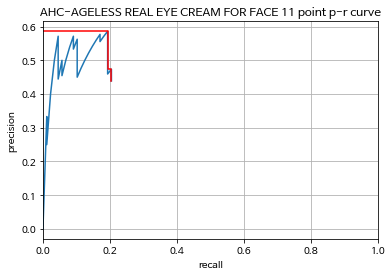

[class]: AHC-Aura Secret Toneup Cream , [AP]: 0.8986509742989242
[Precisions] [1.         1.         1.         1.         1.         1.
 0.94666667 0.93258427 0.78448276 0.63522013 0.5862069 ]


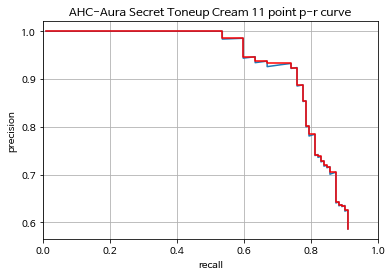

[class]: AHC-ONLY FOR MAN LOTION , [AP]: 0.8762969133813123
[Precisions] [1.         1.         1.         1.         1.         1.
 0.98550725 0.95238095 0.87254902 0.82882883 0.        ]


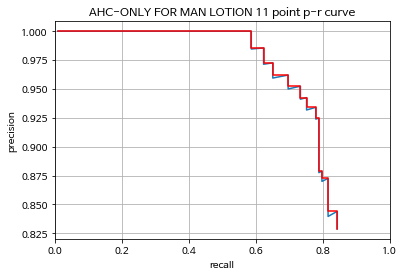

[class]: APIEU-데카소사이드 시카 겔 데이크림 , [AP]: 0.7121162497792471
[Precisions] [1.         1.         1.         0.93939394 0.83673469 0.80645161
 0.80645161 0.80645161 0.63779528 0.         0.        ]


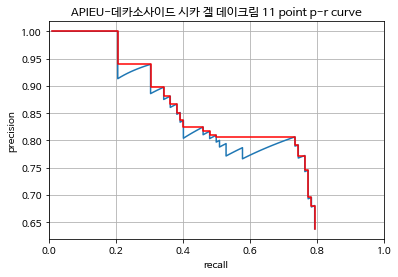

[class]: APIEU-스타트업 포어 프라이머 , [AP]: 0.332932118405542
[Precisions] [1.         0.58823529 0.52777778 0.45070423 0.42222222 0.36363636
 0.30967742 0.         0.         0.         0.        ]


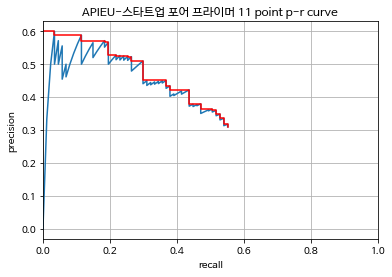

[class]: BANILACO-프라임 프라이머 클래식 , [AP]: 0.5844979652409757
[Precisions] [1.         1.         1.         0.79487179 0.71212121 0.67567568
 0.64130435 0.60550459 0.         0.         0.        ]


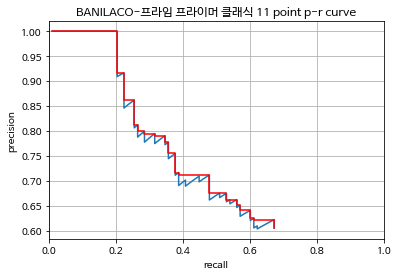

[class]: BELIF-The true cream AQUA BOMB , [AP]: 0.2918732782369146
[Precisions] [1.         0.83333333 0.72727273 0.65       0.         0.
 0.         0.         0.         0.         0.        ]


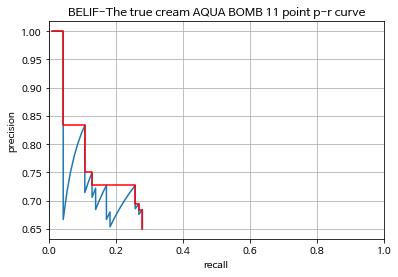

[class]: CLIO-스파클링 라인 프리즘 에어 아이섀도우 , [AP]: 0.4324449661608915
[Precisions] [1.         1.         0.94117647 0.92682927 0.88888889 0.
 0.         0.         0.         0.         0.        ]


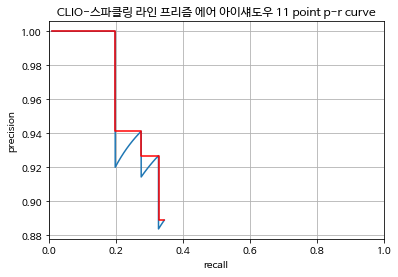

[class]: FERRAGAMO-INCANTO CHARMS , [AP]: 0.984681859987339
[Precisions] [1.         1.         1.         1.         1.         1.
 0.98305085 0.975      0.975      0.96511628 0.93333333]


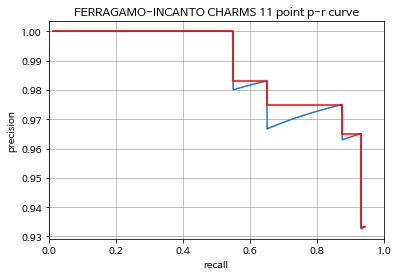

[class]: FERRARI-SCUDERIA BLACK EAU DE TOILETTE SPRAY , [AP]: 0.7658459895435484
[Precisions] [1.         1.         1.         1.         0.97826087 0.9245283
 0.89393939 0.875      0.75257732 0.         0.        ]


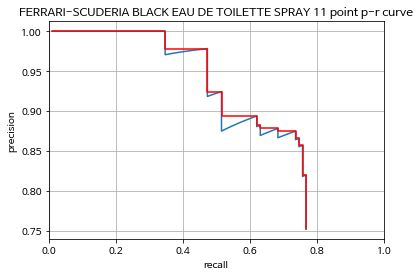

0.6106514451154872
AHC-AGELESS REAL EYE CREAM FOR FACE - 0.2271
AHC-Aura Secret Toneup Cream - 0.8986
AHC-ONLY FOR MAN LOTION - 0.8762
APIEU-데카소사이드 시카 겔 데이크림 - 0.7121
APIEU-스타트업 포어 프라이머 - 0.3329
BANILACO-프라임 프라이머 클래식 - 0.5844
BELIF-The true cream AQUA BOMB - 0.2918
CLIO-스파클링 라인 프리즘 에어 아이섀도우 - 0.4324
FERRAGAMO-INCANTO CHARMS - 0.9846
FERRARI-SCUDERIA BLACK EAU DE TOILETTE SPRAY - 0.7658


In [31]:
from collections import Counter
# https://github.com/rafaelpadilla/Object-Detection-Metrics

def calc_AP(dataset_classes, label, target_all, dfs):
    target = dataset_classes.index(label)
    n_gt = Counter(target_all)

    _df = dfs[label].sort_values(by='confidience', ascending=False) # sort by conf

    _df['FP'] = [0 if tp==1 else 1 for tp in _df['TP']]
    _df['cum_TP'] = _df['TP'].cumsum()
    _df['cum_FP'] = _df['FP'].cumsum()
    _df['precision'] = [tp/(tp+fp) for tp,fp in zip(_df['cum_TP'],_df['cum_FP'])]
    _df['recall'] = _df['cum_TP']/n_gt[target]
    _df['precision_interpolated'] = [_df['precision'][i:].max() for i in range(len(_df['recall']))] 
    _df.reset_index(inplace=True)

    precisions = [_df['precision_interpolated'][_df['recall'].between(0.1*(i-1),0.1*i,inclusive=True)].min() for i in range(11)]
    precisions[0] = 1
    precisions = np.array([0 if p is np.nan else p for p in precisions])
    AP = precisions.mean()
    print('[class]:', label, ', [AP]:', AP)
    print('[Precisions]', precisions)

    plt.plot(_df['recall'], _df['precision'])
    plt.plot(_df['recall'], _df['precision_interpolated'], color='r')
    plt.grid()
    plt.xlim([0,1]), plt.title(label+' 11 point p-r curve')
    plt.xlabel('recall'), plt.ylabel('precision')
    plt.show()

    # display(_df)
    return AP, _df
    
# AP_list = np.array([calc_AP(t)[0] for t in voc_classes])

AP_list = []
df_res_list = {}
for cls in voc_classes:
    AP, df_res = calc_AP(voc_classes, cls, target_all_mAP, dfs)
    AP_list.append(AP)
    df_res_list[cls] = df_res
AP_list = np.array(AP_list)

mAP = AP_list.mean()
print(mAP)
for c,ap in zip(voc_classes, AP_list):
    print(c, '-', str(ap)[:6])

---
# Alse

aaa torch.Size([1, 2048, 12, 20])
bbb torch.Size([1972, 2048])
ccc torch.Size([1, 1972, 2048])
ddd torch.Size([1972, 31]) 34 58
[n_box]: 1972
Wall time: 21 ms
torch.return_types.sort(
values=tensor([0.6270, 0.6162, 0.6140, 0.6132, 0.6055, 0.6023, 0.6015, 0.5960, 0.5959,
        0.5958, 0.5909, 0.5889, 0.5882, 0.5864, 0.5850, 0.5825, 0.5810, 0.5804,
        0.5761, 0.5759, 0.5757, 0.5726, 0.5698, 0.5693, 0.5686, 0.5661, 0.5582,
        0.5542, 0.5536, 0.5480, 0.5450], device='cuda:0'),
indices=tensor([ 0, 25,  9,  2, 29, 22,  4, 23,  8, 20,  7, 28, 15,  1, 10, 14, 16, 27,
        12, 24, 17, 30, 11, 18, 13,  5,  6, 26,  3, 19, 21], device='cuda:0'))


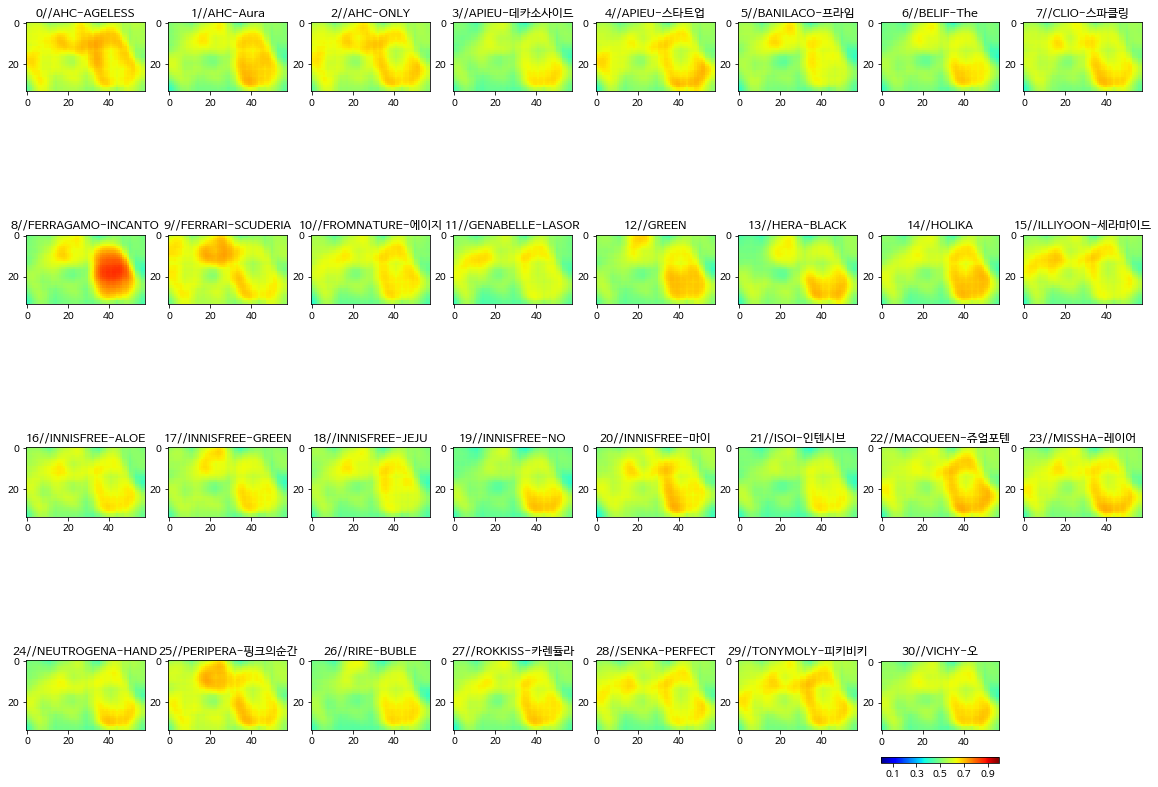

In [15]:
%time preds_dist = textureDetect(featuremaps, filter_size=(3,3), stride=(.33, .33))
# %time preds_dist = textureDetect(rois_gt, filter_size=(3,3), upsample=True, upsample_scale=3)
# %time preds_dist = textureDetect(rois_gt, filter_size=(3,3), stride=(.5, .5))
print(preds_dist.reshape(31, -1).mean(dim=1).sort(descending=True))
plotHeatMap(preds_dist[0])

8 FERRAGAMO-INCANTO CHARMS


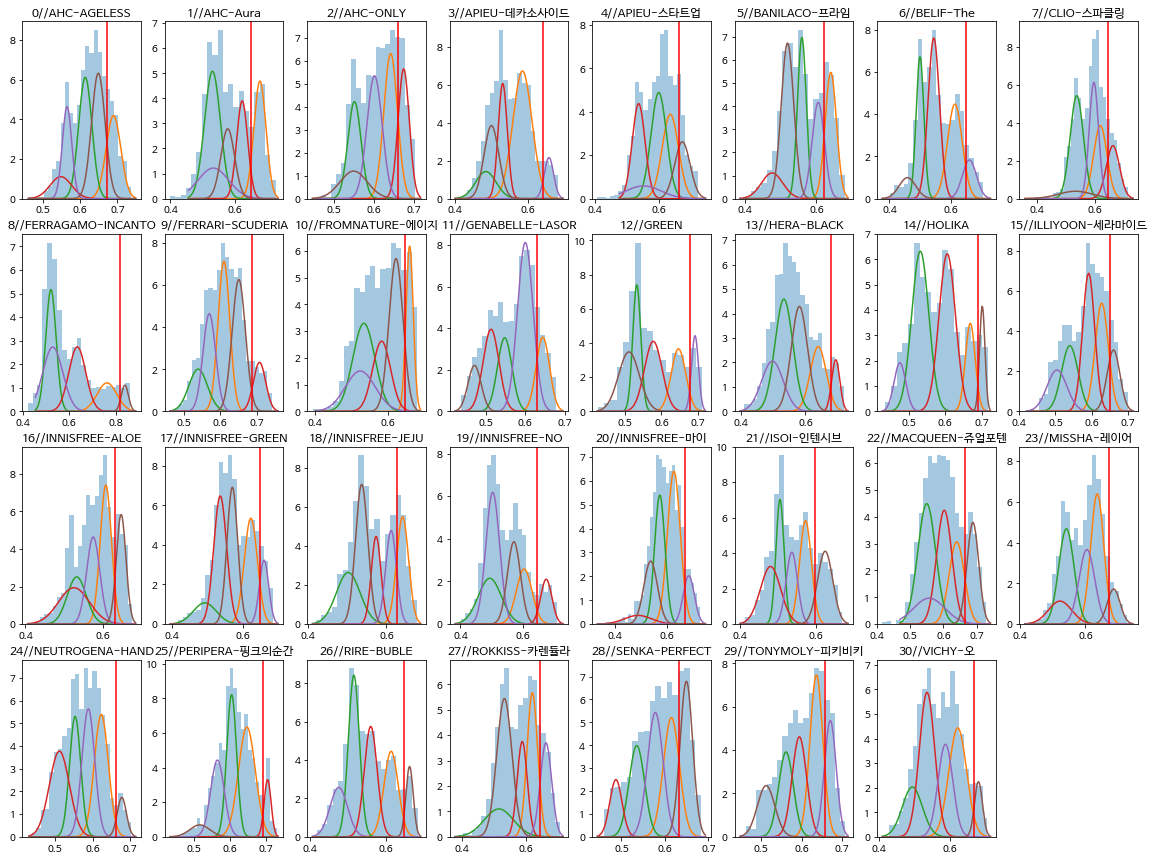

In [16]:
plt.figure(figsize=(20,15))
print(targets_gt[0], voc_val_dataset.classes[targets_gt[0]])
for i in range(31):
    plt.subplot(4,8,i+1)
    plt.title(str(i) + '//' + voc_val_dataset.classes[i].split(' ')[0])    
    sns.distplot(preds_dist[i].flatten().cpu().numpy(), kde=False, norm_hist=True)#, bins=100)
    plotGMM(preds_dist[i], n_components=5)
plt.show()


___
# help

In [69]:
target_all[84], box_yolo_all[84], boxes_gt[[]]

(array([], dtype=int32),
 array([[0.419     , 0.56879195, 0.262     , 0.40604027],
        [0.757     , 0.61073826, 0.454     , 0.45637584],
        [0.925     , 0.44295302, 0.15      , 0.19463087]]),
 array([], shape=(0, 4), dtype=int32))

In [61]:
box_yolo_all[84].shape, heat_all[4].shape, target_all[84].shape

((3, 4), torch.Size([20, 4, 45, 61]), (0,))

In [ ]:
"""
voc 히트맵 저장하기
"""
import time
import matplotlib.patches as patches
# ---------------------------- val set 로드 ---------------------------------
voc_val_dataset = torchvision.datasets.VOCDetection(root='./data', year='2012', image_set='trainval', download=False, 
        transform=transforms.Compose([
        transforms.ToTensor(),
    ]))

voc_val_loader = torch.utils.data.DataLoader(voc_val_dataset, batch_size=1,
                                          shuffle=False, num_workers=4)

voc_transform = transforms.Compose([
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
# assert val_dataset.classes==sample_dir_list, "샘플링 클래스와 데이터로더 클래스가 다름"
# ---------------------------- val set 정확도 측정 ---------------------------------

fps=0
# model.threshold = 0.9*0.08 #0.85 #0.4
model.threshold = 0.88
SHOW_IMAGE = False # 이미지 볼지 말지
USE_KNN = True
dfs = {c:pd.DataFrame(columns=['image', 'confidience', 'TP', 'IOU']) for c in voc_classes} # average precision 저장
target_all_mAP = []

target_all = [] #ground truth bboxs
heat_all = []
box_yolo_all = []
sobel_all = []

print('[num_class]:', len(sample_dir_list), sample_dir_list)
for data, target in tqdm(voc_val_loader):
    startTime = time.time()

    frame = data.clone().detach().mul(255).squeeze().numpy().astype(np.uint8).transpose([1,2,0])

    im_tensor = voc_transform(data.squeeze()).to(model.device).data.unsqueeze(0)
    featuremaps = model(im_tensor)
    targets_gt, boxes_gt, filename_gt = voc_cvt(im_tensor, target) # 정답 데이터, 레이블, bbox
    x1,y1,w1,h1 = cvt_yolobox(cvt2yolobox(boxes_gt, frame.shape[:2]), (224,224))[0]
    if(w1*h1<2000): continue # small image 
    if(len(targets_gt)!=1): continue
    if(targets_gt[0] in [8,10,14]): continue # person, chair, diningtable
    target_all_mAP = np.concatenate([target_all_mAP,  targets_gt])
    preds_dist = textureDetectMultiChannel(featuremaps, stride=(0.33, 0.33), upsample=True)

    #save plots
#     imgs = concatSobel(preds_dist, data)
    imgs=preds_dist
    fig = plt.figure(figsize=(12,12))
    
    # Display the image
    for i in range(4):
        ax = fig.add_subplot(2,2, i+1)
        if(i==3): imgplot = ax.imshow(cv2.resize(frame, (224,224)))
        else: 
            imgplot = ax.imshow(imgs[targets_gt.item()][i].cpu(), cmap='jet')
        #     imgplot.set_clim(0,1)

        # Create a Rectangle patch
        rect = patches.Rectangle((x1,y1),w1,h1, linewidth=2,edgecolor='b',facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.savefig('voc-plot/'+filename_gt)
    plt.clf()